### This is a standalone notebook to compare with old spectral DNS paper

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import os
import sys
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/')
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')
from Slicing import Slicing
from fio import readin
from visualization import contour_generator
from prepare import load_object, save_object
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.legend_handler import HandlerTuple

## <a class="anchor" id="0">Table of content: </a> 

#### [1. Mean profile](#1)
##### [1.1 Plots for supplementary materials](#1.1)
##### [1.2 Precursor checks (from prof files)](#1.2)
#### [2. Velocity fluctuations](#2)

### Some help functions

In [2]:
""" Read in 3D field from matrix """
def read_fields (tseries, path, NGRID = 512):
    ux = []
    uy = []
    uz = []

    for i in range(0,np.size(tseries)):

        NSLICE = 256    
        ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
        uy_3D = {'name':'uy', 'value':[]}
        uz_3D = {'name':'uz', 'value':[]}
        tsimu = tseries[i]
        print(tsimu)

        # Read in the fields either from pickle or from slice data
        for field in (ux_3D,uy_3D,uz_3D):         
            """NOTICE: to accomodate different pickle versions"""
            picklename = path + 'field/' + 'pickle_tiger/' + field['name']+'_t%g' % tsimu +'.pkl'
    #             picklename = working_dir + 'field/' + 'pickle_desktop/' + field['name']+'_t%g' % t +'.pkl'
            exists = os.path.exists(picklename)
            # If the pickle is there read in the pickles
            if exists:
                field['value'] = load_object(picklename)
                print('pickle restored!')
            # If no pickle read in from the slice files and pickle dump
            if not exists:
                for sn in range (0, NSLICE):
                    filename = path + 'field/'+field['name']+'_t%g_slice%g' % (tsimu,sn)
                    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
                    snapshot.reshape([NGRID,NGRID+1])
                    field['value'].append(snapshot[:,0:NGRID].astype(np.float))
                field['value'] = np.array(field['value'])
                save_object(field['value'], picklename)
        ux.append(ux_3D['value'])
        uy.append(uy_3D['value'])
        uz.append(uz_3D['value'])
    
    return (ux,uy,uz)

In [3]:
""" Read in fields without uz """
def read_fields (tseries, path, NGRID = 512):
    ux = []
    uy = []
    uz = []

    for i in range(0,np.size(tseries)):

        NSLICE = 256    
        ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
        uy_3D = {'name':'uy', 'value':[]}
        tsimu = tseries[i]
        print(tsimu)

        # Read in the fields either from pickle or from slice data
        for field in (ux_3D,uy_3D):         
            """NOTICE: to accomodate different pickle versions"""
            picklename = path + 'field/' + 'pickle_tiger/' + field['name']+'_t%g' % tsimu +'.pkl'
    #             picklename = working_dir + 'field/' + 'pickle_desktop/' + field['name']+'_t%g' % t +'.pkl'
            exists = os.path.exists(picklename)
            # If the pickle is there read in the pickles
            if exists:
                field['value'] = load_object(picklename)
                print('pickle restored!')
            # If no pickle read in from the slice files and pickle dump
            if not exists:
                for sn in range (0, NSLICE-1):
                    filename = path + 'field/'+field['name']+'_t%g_slice%g' % (tsimu,sn)
                    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
                    snapshot.reshape([NGRID,NGRID+1])
                    field['value'].append(snapshot[:,0:NGRID].astype(np.float))
                field['value'] = np.array(field['value'])
                save_object(field['value'], picklename)
        ux.append(ux_3D['value'])
        uy.append(uy_3D['value'])
    
    return (ux,uy,uz)

In [ ]:
tseries = np.array((209,210))
ux, uy, uz = read_fields (tseries, path='/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square_LEVEL9_emax03/', NGRID=256)

In [26]:
""" Read in field slices """
tseries = np.array((83,84,85,86,87))
ux1, uy1, uz1 = read_fields (tseries, path='/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_precursor_REtau720_ak0_LEVEL10_emax0.1/', NGRID=512)
tseries = np.array((85,86,87,88,89))
ux2, uy2, uz2 = read_fields (tseries, path='/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_precursor_REtau720_ak0_LEVEL11_emax0.1/', NGRID=512)

83
pickle restored!
pickle restored!
84
pickle restored!
pickle restored!
85
pickle restored!
pickle restored!
86
pickle restored!
pickle restored!
87
pickle restored!
pickle restored!
85
pickle restored!
pickle restored!
86
pickle restored!
pickle restored!
87
pickle restored!
pickle restored!
88
pickle restored!
pickle restored!
89
pickle restored!
pickle restored!


### <a class="anchor" id="1">Mean profile</a>
#### <a class="anchor" id="1.1">Mean profile - plots for supplementary materials</a>
[back](#0)

In [15]:
""" Read in the Kim 1987 paper value. """
Kim_mean = pd.read_csv('otherdata/extracted_data/Kim1987_mean.csv', names=['y1','u1','y2','u2'], delimiter = ',', skiprows=2)
Kim_mean = Kim_mean.sort_values(by='y1', ascending=True)

In [ ]:
""" CHECK: not in log """
fig = plt.figure(figsize=[2.6,1.6]); ax = plt.gca()
y_tau = 1/180; u_tau = 0.1
# plt.plot(Kim_mean.y1/180, Kim_mean.u1, lw=1, c='blue')

stats = stats5
N = 256

ux = stats[0].ux
for (i,stat) in enumerate(stats[1:]):
    plt.plot(stat.y, stat.ux, '--', lw=1, color=plt.cm.get_cmap('summer')(1-i/len(stats[0:])), alpha=0.5)
    ux = ux + stat.ux

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


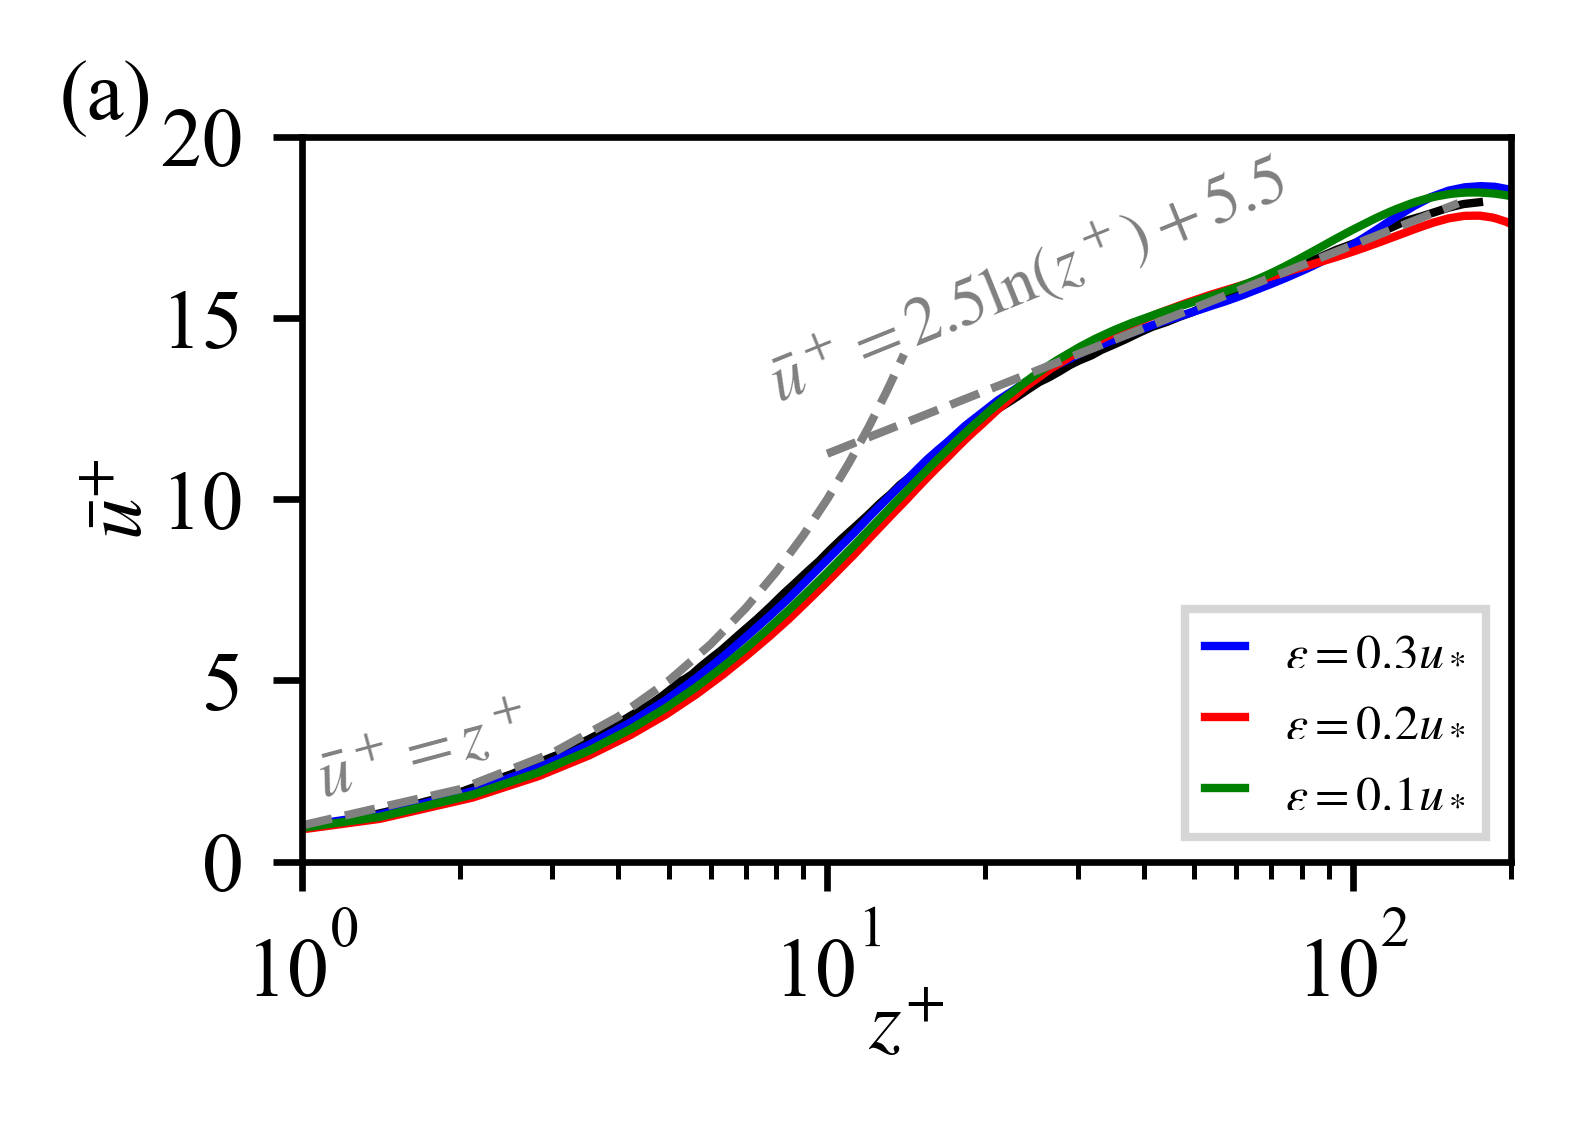

In [18]:
""" FIGURE: RE = 180 """
fig = plt.figure(figsize=[2.6,1.6]); ax = plt.gca()
y_tau = 1/180
u_tau = 0.1
plt.plot(Kim_mean.y1, Kim_mean.u1, lw=1, c='k')
y = np.linspace(-1,1,256)
# ux_mean = (np.average(ux, axis=(0,1,2)) + np.average(ux, axis=(0,1,2))[::-1])*0.5
# ux_mean = (np.average(ux, axis=(0,2,3)) + np.average(ux, axis=(0,2,3))[::-1])*0.5
# plt.plot((y[0:127]+1)/y_tau, ux_mean[0:127]/u_tau, lw=1, c='b')
# ux_mean = (np.average(ux[-1], axis=(0,1))+np.average(ux[-1], axis=(0,1))[::-1])*0.5
# plt.plot((y[0:255]+1)/y_tau, ux_mean[0:255]/u_tau, lw=1, c='r')

ux = []
for i in range(150,170,2):
    filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square180/square_LEVEL9_emax0.3_resume/prof_%g' %i
    stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
    # ux = (np.array(stat.ux)+np.array(stat.ux)[::-1])/2
    ux.append(stat.ux)
#     plt.plot((stat.y[1:]+1)/y_tau, stat.ux[1:]/u_tau, lw=1, c='gray', alpha=0.5)
ux = np.array(ux)
plt.plot((stat.y[1:]+1)/y_tau, np.average(ux, axis=0)[1:]/u_tau, label = r'$\epsilon=0.3u_*$', lw=1, c='b')

ux = []
for i in range(200,300,1):
    filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square180/square_LEVEL9_emax0.2_resume/prof_%g' %i
    stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
    # ux = (np.array(stat.ux)+np.array(stat.ux)[::-1])/2
    ux.append(stat.ux)
#     plt.plot((stat.y[1:]+1)/y_tau, stat.ux[1:]/u_tau, lw=1, c='gray', alpha=0.5)
ux = np.array(ux)
plt.plot((stat.y[1:]+1)/y_tau, np.average(ux, axis=0)[1:]/u_tau, label = r'$\epsilon=0.2u_*$', lw=1, c='r')

ux = []
for i in range(200,300,1):
    filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square180/square_LEVEL9_emax0.1_resume/prof_%g' %i
    stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
    # ux = (np.array(stat.ux)+np.array(stat.ux)[::-1])/2
    ux.append(stat.ux)
#     plt.plot((stat.y[1:]+1)/y_tau, stat.ux[1:]/u_tau, lw=1, c='gray', alpha=0.5)
ux = np.array(ux)
plt.plot((stat.y[1:]+1)/y_tau, np.average(ux, axis=0)[1:]/u_tau, label = r'$\epsilon=0.1u_*$', lw=1, c='g')

y = np.arange(10,160)
plt.plot(y, 2.5*np.log(y)+5.5, '--', lw=1, color='gray')
y = np.arange(1,15)
plt.plot(y, y,  '--', lw=1, color='gray')
ax.text(0.1, 0.15, r'$\bar{u}^+=z^+$', ha='center', va='center', rotation=15., fontsize=8, 
        color='gray', transform=ax.transAxes)
ax.text(0.6, 0.8, r'$\bar{u}^+=2.5\ln(z^+)+5.5$', ha='center', va='center', rotation=22, fontsize=8,
        color='gray', transform=ax.transAxes)

plt.legend(loc='lower right', fancybox=False, fontsize=6, handlelength=0.8)
plt.xscale('log'); plt.ylabel(r'$\bar{u}^{\plus}$', labelpad=0); plt.xlabel(r'$z^{\plus}$', labelpad=-3)
plt.xlim([1,200]); plt.ylim([0,20])
ax.annotate('(a)', xy=(-0.2, 1), ha='left', va='bottom', xycoords='axes fraction')
fig.savefig('figures_jfm/DNS_mean.pdf', bbox_inches='tight', pad_inches=0)
fig.savefig('figures_jfm/DNS_mean.eps', bbox_inches='tight', pad_inches=0)

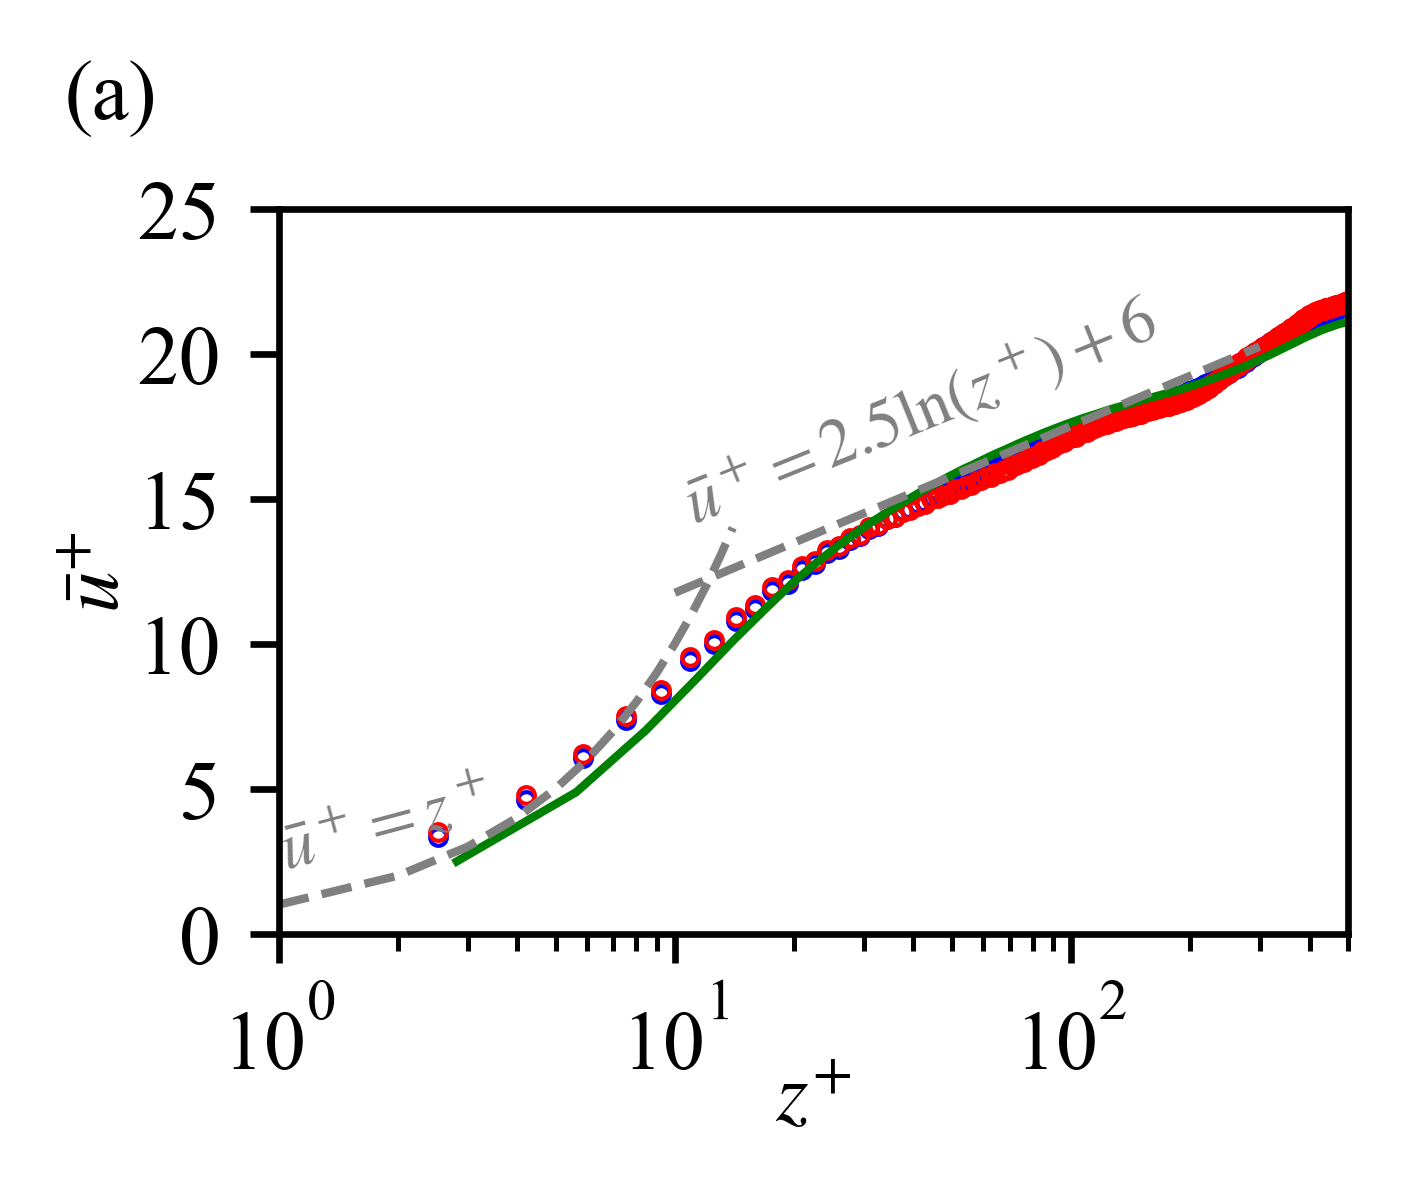

In [58]:
""" FIGURE: RE = 720 """
fig = plt.figure(figsize=[2.3,1.6]); ax = plt.gca()
# plt.plot(Kim_mean.y1, Kim_mean.u1, lw=1, c='k')

""" Two phase case """
y_tau = (2*np.pi-1)/720
u_tau = 0.25
y = np.linspace(-1,np.pi*2-1,512,endpoint=False)+2*np.pi/2**512/2*3 # the *3 is because of wrong slice indexing
# ux_mean = (np.average(ux, axis=(0,2,3)) + np.average(ux, axis=(0,2,3))[::-1])*0.5
ux_mean = np.average(ux1, axis=(0,1,2))
plt.plot((y[:])/y_tau, ux_mean/u_tau, c='b', marker='o', mfc='none', lw=0, markersize=2, markeredgewidth=0.5)
ux_mean = np.average(ux2, axis=(0,1,2))
plt.plot((y[:])/y_tau, ux_mean/u_tau, c='r', marker='o', mfc='none', lw=0, markersize=2, markeredgewidth=0.5)

""" One phase case """
y_tau = 1/720
u_tau = 0.1
# filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square720/square_LEVEL9_emax0.3/prof_%g' %93
# stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
# ux = (np.array(stat.ux)+np.array(stat.ux)[::-1])/2
# plt.plot((stat.y[1:]+1)/y_tau, ux[1:]/u_tau, lw=1, c='b')
# filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square720/square_LEVEL10_emax0.3/prof_%g' %97
# stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
# ux = (np.array(stat.ux)+np.array(stat.ux)[::-1])/2
# ux = np.array(stat.ux)
# plt.plot((stat.y[:]+1)/y_tau, ux[::-1]/u_tau, lw=1, c='r')
# plt.plot((stat.y[1:]+1)/y_tau, ux[1:]/u_tau, lw=1, c='r')

# filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square720/square_LEVEL9_emax0.3/prof_%g' %122
# stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
# ux = (np.array(stat.ux)+np.array(stat.ux)[::-1])/2
# plt.plot((stat.y[1:]+1)/y_tau, ux[1:]/u_tau, lw=1, c='g')

ux = []
for i in range(124,140):
    filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square720/square_LEVEL9_emax0.3/prof_%g' %i
    stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
    ux_ = (np.array(stat.ux)+np.array(stat.ux)[::-1])/2
    ux.append(ux_)
ux = np.array(ux)
#     plt.plot((stat.y[1:]+1)/y_tau, stat.ux[1:]/u_tau, lw=1, c='gray', alpha=0.5)
plt.plot((stat.y[1:250]+1)/y_tau, np.average(ux, axis=0)[1:250]/u_tau, lw=1, c='g')

# ux = []
# for i in range(140,165):
#     filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square720/square_LEVEL9_emax0.2/prof_%g' %i
#     stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
#     ux_ = (np.array(stat.ux)+np.array(stat.ux)[::-1])/2
#     ux.append(ux_)
# ux = np.array(ux)
# #     plt.plot((stat.y[1:]+1)/y_tau, stat.ux[1:]/u_tau, lw=1, c='gray', alpha=0.5)
# plt.plot((stat.y[1:250]+1)/y_tau, np.average(ux, axis=0)[1:250]/u_tau, lw=1, c='r')

# ux = []
# for i in range(130,142):
#     filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square720/square_LEVEL10_emax0.3/prof_%g' %i
#     stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
#     ux_ = (np.array(stat.ux)+np.array(stat.ux)[::-1])/2
#     ux.append(ux_)
# ux = np.array(ux)
# #     plt.plot((stat.y[1:]+1)/y_tau, stat.ux[1:]/u_tau, lw=1, c='gray', alpha=0.5)
# plt.plot((stat.y[1:500]+1)/y_tau, np.average(ux, axis=0)[1:500]/u_tau, lw=1, c='b')

# filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/square720/square_LEVEL9_emax0.1/prof_%g' %129
# stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
# ux = (np.array(stat.ux)+np.array(stat.ux)[::-1])/2
# plt.plot((stat.y[1:]+1)/y_tau, ux[1::]/u_tau, lw=1, c='b')

y = np.arange(10,300)
plt.plot(y, 2.5*np.log(y)+6, '--', lw=1, color='gray')
y = np.arange(1,15)
plt.plot(y, y,  '--', lw=1, label=r'$\bar{u}^{\plus}=y^{\plus}$', color='gray')
ax.text(0.1, 0.15, r'$\bar{u}^+=z^+$', ha='center', va='center', rotation=15., fontsize=8, 
        color='gray', transform=ax.transAxes)
ax.text(0.6, 0.72, r'$\bar{u}^+=2.5\ln(z^+)+6$', ha='center', va='center', rotation=22, fontsize=8,
        color='gray', transform=ax.transAxes)

plt.xscale('log'); 
plt.xlim([1,500]); plt.ylim([0,25])
plt.ylabel(r'$\bar{u}^{\plus}$', labelpad=0); plt.xlabel(r'$z^{\plus}$', labelpad=-3)
ax.set_yticks(np.arange(0,30,5))
ax.annotate('(a)', xy=(-0.2, 1.1), ha='left', va='bottom', xycoords='axes fraction')
fig.savefig('figures_jfm/DNS_mean_720.pdf', bbox_inches='tight', pad_inches=0)
fig.savefig('figures_jfm/DNS_mean_720.eps', bbox_inches='tight', pad_inches=0)

In [ ]:
""" CHECK: time scale """
L0 = 1
ustar = 0.1
T_e = 

In [61]:
""" CHECK: Length scale """
level = 7
Delta = 2*np.pi/2**level
delta = (2*np.pi-1)/720
delta/Delta

0.14948356567255194

#### <a class="anchor" id="1.2">Mean profile - wavy precursor checks </a>
[back](#0)

Text(0.5, 0, '$z^{\\plus}$')

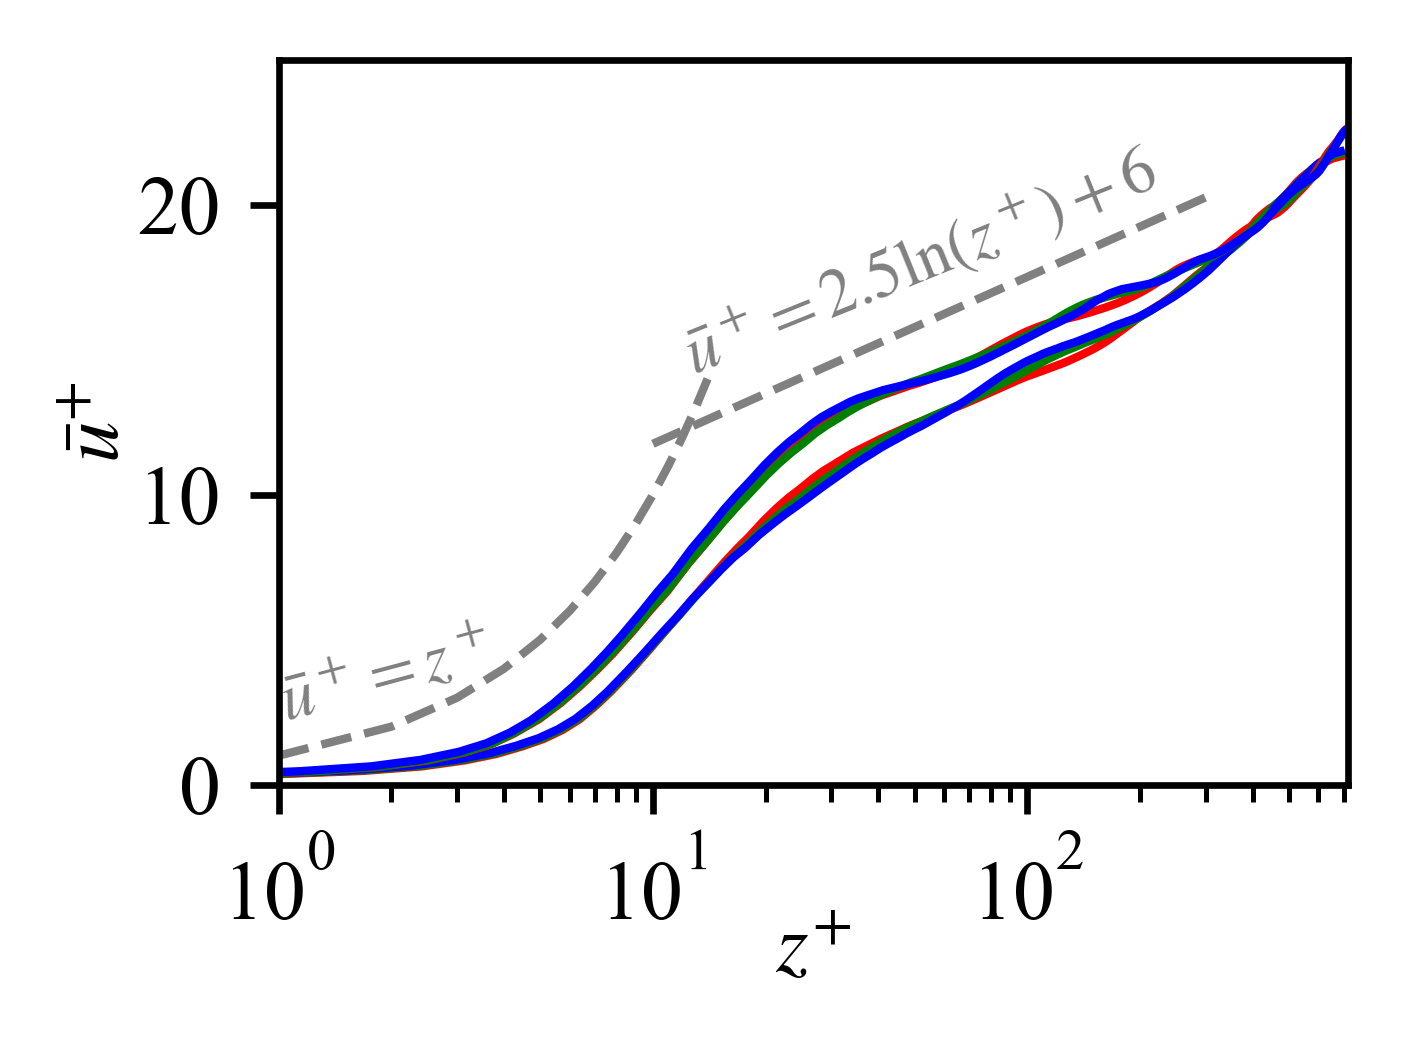

In [14]:
""" CHECK: mean ak=0.1 precursor """
fig = plt.figure(figsize=[2.3,1.6]); ax = plt.gca()
y_tau = (2*np.pi-1)/720
u_tau = 0.25

path = '/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_precursor_REtau720_ak0.15_LEVEL10_emax0.3_new/'

filename = path + 'prof_%g' %40
stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
plt.plot((stat.y[1:]-1)/y_tau, stat.ux[1::]/u_tau, lw=1, c='r')
filename = path + 'prof_%g' %42
stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
plt.plot((stat.y[1:]-1)/y_tau, stat.ux[1::]/u_tau, lw=1, c='g')
filename = path + 'prof_%g' %43.5
stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
plt.plot((stat.y[1:]-1)/y_tau, stat.ux[1::]/u_tau, lw=1, c='b')

""" Plot the old one! and ak=0.2 """

path = '/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_precursor_REtau720_ak0.1_LEVEL10_emax0.3/'

filename = path + 'prof_%g' %60
stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
plt.plot((stat.y[1:]-1)/y_tau, stat.ux[1::]/u_tau, lw=1, c='r')
filename = path + 'prof_%g' %62.5
stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
plt.plot((stat.y[1:]-1)/y_tau, stat.ux[1::]/u_tau, lw=1, c='g')
filename = path + 'prof_%g' %64.5
stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
plt.plot((stat.y[1:]-1)/y_tau, stat.ux[1::]/u_tau, lw=1, c='b')

# path = '/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_precursor_REtau720_ak0.2_LEVEL10_emax0.3/'

# filename = path + 'prof_%g' %300
# stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
# plt.plot((stat.y[1:]-1)/y_tau, stat.ux[1::]/u_tau, lw=1, c='r')
# # filename = path + 'prof_%g' %62.5
# stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
# plt.plot((stat.y[1:]-1)/y_tau, stat.ux[1::]/u_tau, lw=1, c='g')
# filename = path + 'prof_%g' %64.5
# stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
# plt.plot((stat.y[1:]-1)/y_tau, stat.ux[1::]/u_tau, lw=1, c='b')

y = np.arange(10,300)
plt.plot(y, 2.5*np.log(y)+6, '--', lw=1, color='gray')
y = np.arange(1,15)
plt.plot(y, y,  '--', lw=1, label=r'$\bar{u}^{\plus}=y^{\plus}$', color='gray')
ax.text(0.1, 0.15, r'$\bar{u}^+=z^+$', ha='center', va='center', rotation=15., fontsize=8, 
        color='gray', transform=ax.transAxes)
ax.text(0.6, 0.72, r'$\bar{u}^+=2.5\ln(z^+)+6$', ha='center', va='center', rotation=22, fontsize=8,
        color='gray', transform=ax.transAxes)

plt.xscale('log'); 
plt.xlim([1,720]); plt.ylim([0,25])
plt.ylabel(r'$\bar{u}^{\plus}$', labelpad=0); plt.xlabel(r'$z^{\plus}$', labelpad=-3)


### <a class="anchor" id="2">Velocity fluctuations </a> 
[back](#0)

In [5]:
Kim_rms = pd.read_csv('otherdata/extracted_data/Kim1987_rms.csv', names=['y1','wrms','y2','vrms','y3','urms'], delimiter = ',', skiprows=2)

Text(-0.2, 1, '(b)')

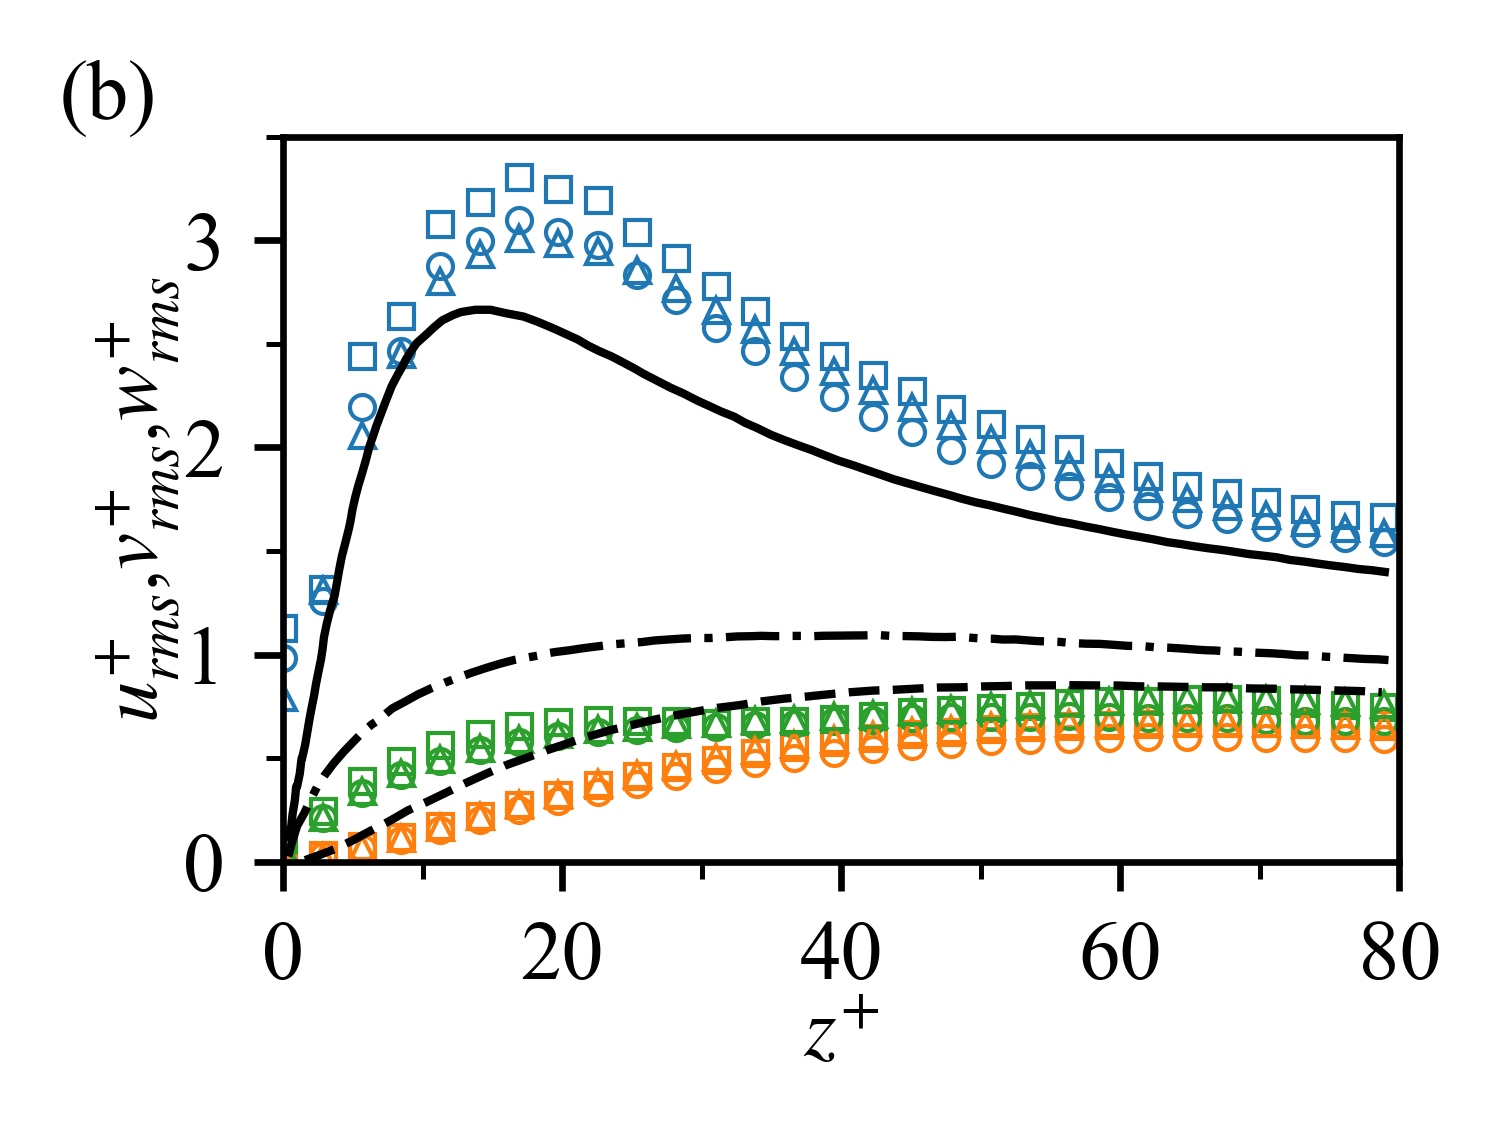

In [32]:
""" FIGURE: RE=180 """
fig = plt.figure(figsize=[2.4,1.6]); ax=plt.gca()

def plots_3 (folder='square_LEVEL7_emax0.1', tseries=np.arange(180,200), marker='o', skip=1, N=200, y_tau = 1/180, u_tau=0.1):   
    stats = [];
    for t in tseries:
        filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/' + folder + '/prof_%g' %t
        stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
        stats.append(stat)

    uxux = (stats[0].uxux-stats[0].ux*stats[0].ux)**0.5/0.1
    uyuy = (stats[0].uyuy-stats[0].uy*stats[0].uy)**0.5/0.1
    uzuz = (stats[0].uzuz-stats[0].uz*stats[0].uz)**0.5/0.1
    for stat in stats[1:]:
        uxux = uxux + (stat.uxux-stat.ux*stat.ux)**0.5/0.1
        uyuy = uyuy + (stat.uyuy-stat.uy*stat.uy)**0.5/0.1
        uzuz = uzuz + (stat.uzuz-stat.uz*stat.uz)**0.5/0.1

    uxux = (np.array(uxux) + np.array(uxux)[::-1])/2
    uyuy = (np.array(uyuy) + np.array(uyuy)[::-1])/2
    uzuz = (np.array(uzuz) + np.array(uzuz)[::-1])/2

    plt.plot((stats[0].y[0:N:skip]+1)/y_tau, uxux[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C0')
    # plt.plot((stat.y+1)/y_tau, (stats1[0].uxux-stats1[0].ux*stats1[0].ux)**0.5/0.1, label = '$u_{rms}/u_*$', marker='o', mfc='none', lw=0, markersize=3, markeredgewidth=0.5)
    plt.plot((stats[0].y[0:N:skip]+1)/y_tau, uyuy[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C1')
    plt.plot((stats[0].y[0:N:skip]+1)/y_tau, uzuz[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C2')

# plots(folder='square/square_LEVEL7_emax0.1', tseries=np.arange(250,341), marker='o')
# plots(folder='square_LEVEL8_emax0.1', tseries=np.arange(190,200), marker='^')
# plots(folder='square_LEVEL9_emax0.1', tseries=np.arange(230,240), marker='s', skip=2)
plots_3(folder='square180/square_LEVEL9_emax0.3_resume', tseries=np.arange(160,200), marker='s', skip=4)
plots_3(folder='square180/square_LEVEL9_emax0.2_resume', tseries=np.arange(300,405), marker='o', skip=4)
plots_3(folder='square180/square_LEVEL9_emax0.1_resume', tseries=np.arange(200,300), marker='^', skip=4)


# plots(folder='square/square_LEVEL9_emax0.05', tseries=np.arange(181,186), marker='s', skip=2, y_tau = 1/180)
# plots(folder='square_LEVEL10_emax03_720', tseries=np.arange(360,362), marker='s', skip=2, y_tau = 1/720)
# plots(folder='square_LEVEL9_emax03_720', tseries=np.arange(345,356), marker='s', skip=1, y_tau = 1/720)
# The emax03 cases look pretty bad
# plots(folder='square_LEVEL7_emax0.3', tseries=np.arange(320,341), marker='o')
# plots(folder='square_LEVEL8_emax0.3', tseries=np.arange(190,200), marker='^')
# plots(folder='square_LEVEL9_emax0.3', tseries=np.arange(230,251), marker='s', skip=4)

Kim_rms = Kim_rms.sort_values(by='y1', ascending=True)
plt.plot(Kim_rms.y1, Kim_rms.wrms, '--', lw=1, c='k')
Kim_rms = Kim_rms.sort_values(by='y2', ascending=True)
plt.plot(Kim_rms.y2, Kim_rms.vrms, '-.', lw=1, c='k')
Kim_rms = Kim_rms.sort_values(by='y3', ascending=True)
plt.plot(Kim_rms.y3, Kim_rms.urms, '-', lw=1, c='k')
# plt.plot(stat.y, (stat.uyuy-stat.uy*stat.uy)**0.5/0.1, label = '$v_{rms}/u_*$')
# plt.plot(stat.y, (stat.uzuz-stat.uz*stat.uz)**0.5/0.1, label = '$w_{rms}/u_*$')

plt.ylim([0,3.5]); 
plt.xlim([0,80]); 
plt.xlabel('$z^{+}$', labelpad=0); plt.ylabel('$u_{rms}^{+}$,$v_{rms}^{+}$,$w_{rms}^{+}$', labelpad=0)
plt.xticks(np.arange(0,81,20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.annotate('(b)', xy=(-0.2, 1), ha='left', va='bottom', xycoords='axes fraction')
# fig.savefig('figures_jfm/DNS_rms_sq_emax03.pdf', bbox_inches='tight', pad_inches=0)
# fig.savefig('figures_jfm/DNS_rms_sq_emax03.eps', bbox_inches='tight', pad_inches=0)

Text(-0.2, 1, '(b)')

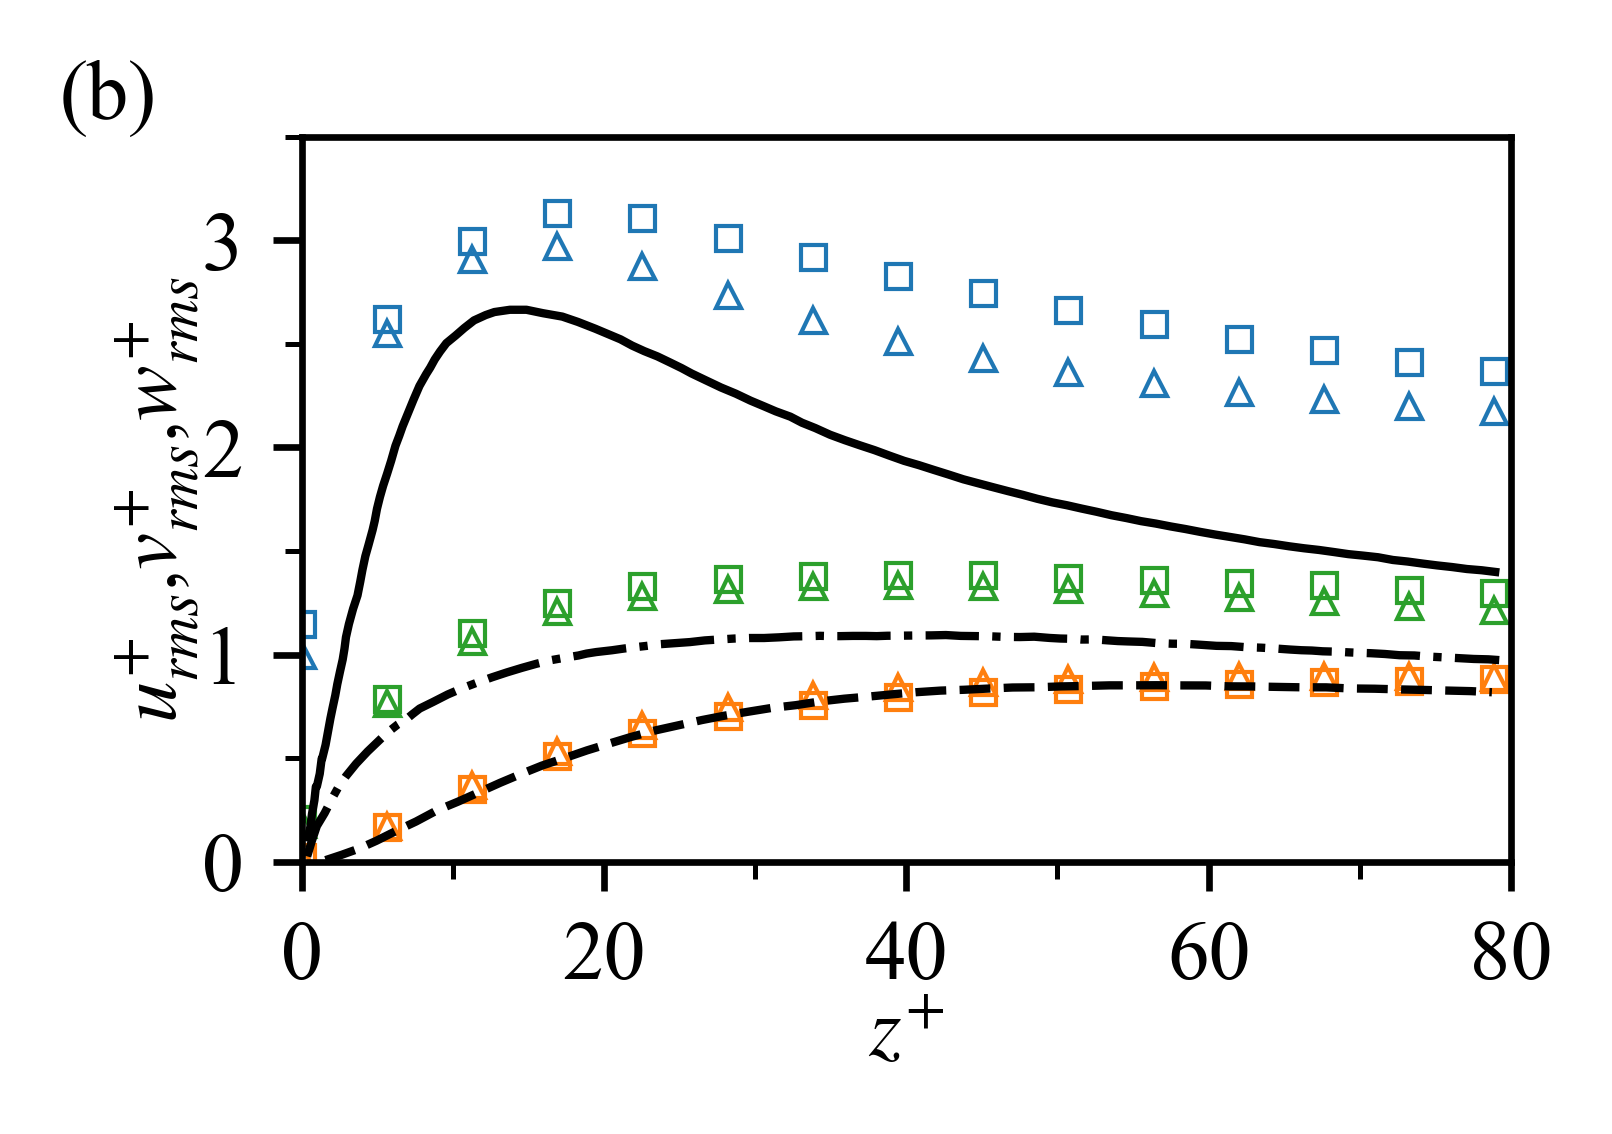

In [15]:
""" RE=720 """
fig = plt.figure(figsize=[2.6,1.6]); ax=plt.gca()

def plots_2 (ux_ensem, uy_ensem, marker='o'):  
    y = np.linspace(-1,np.pi*2-1,512,endpoint=False)+2*np.pi/2**512/2*3 # the *3 is because of wrong slice indexing
    uxux = np.zeros((ux_ensem.shape[0],512)); uyuy = np.zeros((ux_ensem.shape[0],512))
    for i in range(ux_ensem.shape[0]):
        ux_aver = np.tile(np.average(ux_ensem[i], axis=(0,1)), (255,512,1))
        uy_aver = np.tile(np.average(uy_ensem[i], axis=(0,1)), (255,512,1))
        uxux[i] = (np.average((ux_ensem[i]-ux_aver)**2, axis=(0,1)))
        uyuy[i] = (np.average((uy_ensem[i]-uy_aver)**2, axis=(0,1)))

    plt.plot(y/y_tau, np.average(uxux, axis=0)**0.5/u_tau, label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C0')
    plt.plot(y/y_tau, np.average(uyuy, axis=0)**0.5/u_tau, label = '$v_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C1')
    
def plots_3 (folder='square_LEVEL7_emax0.1', tseries=np.arange(180,200), marker='o', skip=1, N=200, y_tau = 1/180, u_tau=0.1):   
    stats = [];
    for t in tseries:
        filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/' + folder + '/prof_%g' %t
        stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
        stats.append(stat)

    uxux = (stats[0].uxux-stats[0].ux*stats[0].ux)**0.5/0.1
    uyuy = (stats[0].uyuy-stats[0].uy*stats[0].uy)**0.5/0.1
    uzuz = (stats[0].uzuz-stats[0].uz*stats[0].uz)**0.5/0.1
    for stat in stats[1:]:
        uxux = uxux + (stat.uxux-stat.ux*stat.ux)**0.5/0.1
        uyuy = uyuy + (stat.uyuy-stat.uy*stat.uy)**0.5/0.1
        uzuz = uzuz + (stat.uzuz-stat.uz*stat.uz)**0.5/0.1

    uxux = (np.array(uxux) + np.array(uxux)[::-1])/2
    uyuy = (np.array(uyuy) + np.array(uyuy)[::-1])/2
    uzuz = (np.array(uzuz) + np.array(uzuz)[::-1])/2

    plt.plot((stats[0].y[0:N:skip]+1)/y_tau, uxux[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C0')
    # plt.plot((stat.y+1)/y_tau, (stats1[0].uxux-stats1[0].ux*stats1[0].ux)**0.5/0.1, label = '$u_{rms}/u_*$', marker='o', mfc='none', lw=0, markersize=3, markeredgewidth=0.5)
    plt.plot((stats[0].y[0:N:skip]+1)/y_tau, uyuy[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C1')
    plt.plot((stats[0].y[0:N:skip]+1)/y_tau, uzuz[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C2')


# y_tau = (2*np.pi-1)/720
# u_tau = 0.25
# plots_2(np.array(ux1),np.array(uy1))
# plots_2(np.array(ux2),np.array(uy2))

y_tau = 1/720
u_tau = 0.1
plots_3(folder='square720/square_LEVEL9_emax0.3', tseries=np.arange(120,140), marker='s', skip=2, y_tau = 1/720, u_tau=0.1)
plots_3(folder='square720/square_LEVEL9_emax0.2', tseries=np.arange(130,1650), marker='^', skip=2, y_tau = 1/720, u_tau=0.1)
# plots_3(folder='square720/square_LEVEL10_emax0.3', tseries=np.arange(130,142), marker='o', skip=2, y_tau = 1/720)

Kim_rms = Kim_rms.sort_values(by='y1', ascending=True)
plt.plot(Kim_rms.y1, Kim_rms.wrms, '--', lw=1, c='k')
Kim_rms = Kim_rms.sort_values(by='y2', ascending=True)
plt.plot(Kim_rms.y2, Kim_rms.vrms, '-.', lw=1, c='k')
Kim_rms = Kim_rms.sort_values(by='y3', ascending=True)
plt.plot(Kim_rms.y3, Kim_rms.urms, '-', lw=1, c='k')
# plt.plot(stat.y, (stat.uyuy-stat.uy*stat.uy)**0.5/0.1, label = '$v_{rms}/u_*$')
# plt.plot(stat.y, (stat.uzuz-stat.uz*stat.uz)**0.5/0.1, label = '$w_{rms}/u_*$')

plt.ylim([0,3.5]); 
plt.xlim([0,80]); 
plt.xlabel('$z^{+}$', labelpad=0); plt.ylabel('$u_{rms}^{+}$,$v_{rms}^{+}$,$w_{rms}^{+}$', labelpad=0)
plt.xticks(np.arange(0,81,20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.annotate('(b)', xy=(-0.2, 1), ha='left', va='bottom', xycoords='axes fraction')
fig.savefig('figures_jfm/DNS_rms_sq_emax03.pdf', bbox_inches='tight', pad_inches=0)
fig.savefig('figures_jfm/DNS_rms_sq_emax03.eps', bbox_inches='tight', pad_inches=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


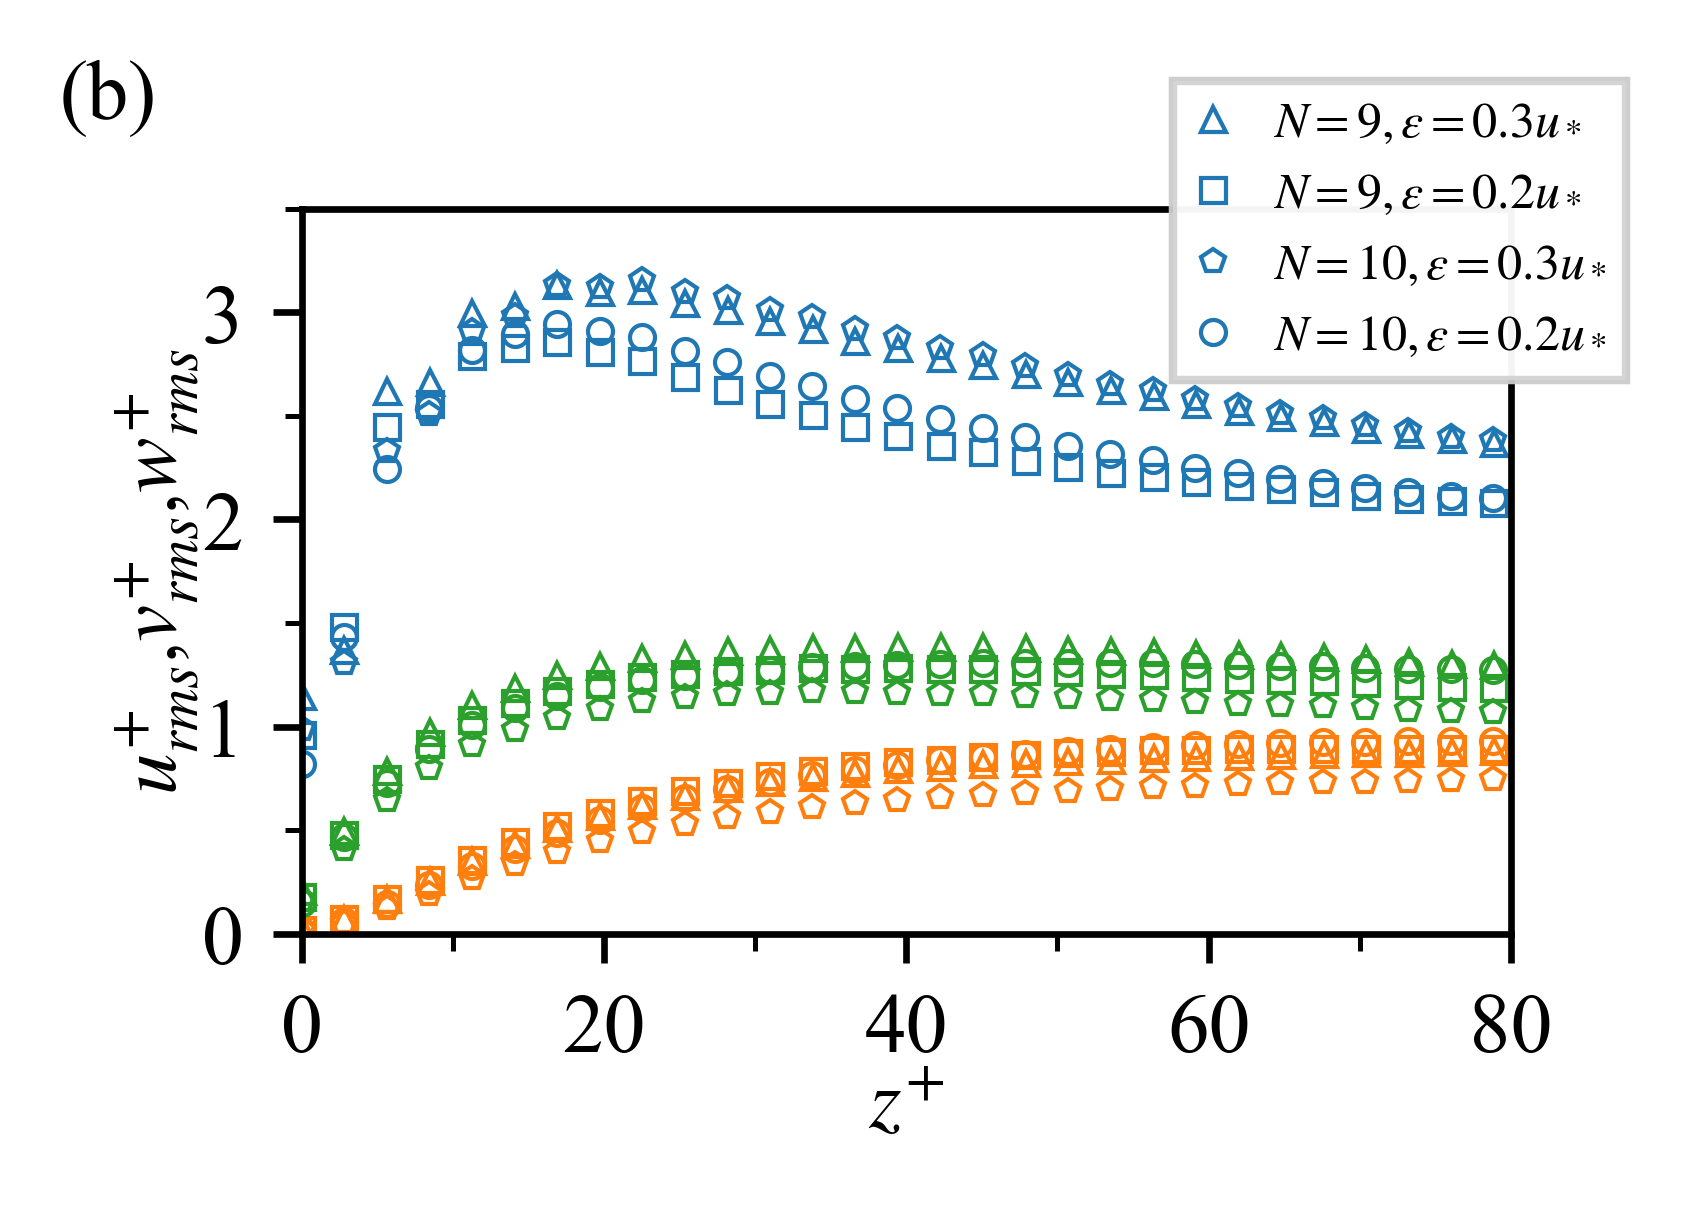

In [59]:
""" RE=720 """
fig = plt.figure(figsize=[2.6,1.6]); ax=plt.gca()

def plots_2 (ux_ensem, uy_ensem, marker='o'):  
    y = np.linspace(-1,np.pi*2-1,512,endpoint=False)+2*np.pi/2**512/2*3 # the *3 is because of wrong slice indexing
    uxux = np.zeros((ux_ensem.shape[0],512)); uyuy = np.zeros((ux_ensem.shape[0],512))
    for i in range(ux_ensem.shape[0]):
        ux_aver = np.tile(np.average(ux_ensem[i], axis=(0,1)), (255,512,1))
        uy_aver = np.tile(np.average(uy_ensem[i], axis=(0,1)), (255,512,1))
        uxux[i] = (np.average((ux_ensem[i]-ux_aver)**2, axis=(0,1)))
        uyuy[i] = (np.average((uy_ensem[i]-uy_aver)**2, axis=(0,1)))

    plt.plot(y/y_tau, np.average(uxux, axis=0)**0.5/u_tau, label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C0')
    plt.plot(y/y_tau, np.average(uyuy, axis=0)**0.5/u_tau, label = '$v_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C1')
    
def plots_3 (folder='square_LEVEL7_emax0.1', tseries=np.arange(180,200), marker='o', skip=1, N=200, y_tau = 1/180, u_tau=0.1):   
    stats = [];
    for t in tseries:
        filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/' + folder + '/prof_%g' %t
        stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
        stats.append(stat)

    uxux = (stats[0].uxux-stats[0].ux*stats[0].ux)**0.5/0.1
    uyuy = (stats[0].uyuy-stats[0].uy*stats[0].uy)**0.5/0.1
    uzuz = (stats[0].uzuz-stats[0].uz*stats[0].uz)**0.5/0.1
    for stat in stats[1:]:
        uxux = uxux + (stat.uxux-stat.ux*stat.ux)**0.5/0.1
        uyuy = uyuy + (stat.uyuy-stat.uy*stat.uy)**0.5/0.1
        uzuz = uzuz + (stat.uzuz-stat.uz*stat.uz)**0.5/0.1

    uxux = (np.array(uxux) + np.array(uxux)[::-1])/2
    uyuy = (np.array(uyuy) + np.array(uyuy)[::-1])/2
    uzuz = (np.array(uzuz) + np.array(uzuz)[::-1])/2

    l1, = plt.plot((stats[0].y[0:N:skip]+1)/y_tau, uxux[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C0')
    # plt.plot((stat.y+1)/y_tau, (stats1[0].uxux-stats1[0].ux*stats1[0].ux)**0.5/0.1, label = '$u_{rms}/u_*$', marker='o', mfc='none', lw=0, markersize=3, markeredgewidth=0.5)
    plt.plot((stats[0].y[0:N:skip]+1)/y_tau, uyuy[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C1')
    plt.plot((stats[0].y[0:N:skip]+1)/y_tau, uzuz[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C2')
    return l1

# y_tau = (2*np.pi-1)/720
# u_tau = 0.25
# plots_2(np.array(ux1),np.array(uy1))
# plots_2(np.array(ux2),np.array(uy2))

y_tau = 1/720
u_tau = 0.1
l1 = plots_3(folder='square720/square_LEVEL9_emax0.3', tseries=np.arange(120,140), marker='^', skip=1, y_tau = 1/720, u_tau=0.1)
l2 = plots_3(folder='square720/square_LEVEL9_emax0.2', tseries=np.arange(150,166), marker='s', skip=1, y_tau = 1/720, u_tau=0.1)
l3 = plots_3(folder='square720/square_LEVEL10_emax0.3', tseries=np.arange(135,142), marker='p', skip=2, y_tau = 1/720, u_tau=0.1)
l4 = plots_3(folder='square720/square_LEVEL10_emax0.2', tseries=np.arange(140,151), marker='o', skip=2, y_tau = 1/720, u_tau=0.1)

legend1 = plt.legend([l1,l2,l3,l4], [r'$N=9, \epsilon=0.3u_*$',r'$N=9, \epsilon=0.2u_*$',r'$N=10, \epsilon=0.3u_*$',r'$N=10, \epsilon=0.2u_*$'],
                    handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.7, 0.97), fancybox=False, fontsize=6, handlelength=0.8)
ax.add_artist(legend1)


# Kim_rms = Kim_rms.sort_values(by='y1', ascending=True)
# plt.plot(Kim_rms.y1, Kim_rms.wrms, '--', lw=1, c='k')
# Kim_rms = Kim_rms.sort_values(by='y2', ascending=True)
# plt.plot(Kim_rms.y2, Kim_rms.vrms, '-.', lw=1, c='k')
# Kim_rms = Kim_rms.sort_values(by='y3', ascending=True)
# plt.plot(Kim_rms.y3, Kim_rms.urms, '-', lw=1, c='k')

# plt.plot(stat.y, (stat.uyuy-stat.uy*stat.uy)**0.5/0.1, label = '$v_{rms}/u_*$')
# plt.plot(stat.y, (stat.uzuz-stat.uz*stat.uz)**0.5/0.1, label = '$w_{rms}/u_*$')

plt.ylim([0,3.5]); 
plt.xlim([0,80]); 
plt.xlabel('$z^{+}$', labelpad=0); plt.ylabel('$u_{rms}^{+}$,$v_{rms}^{+}$,$w_{rms}^{+}$', labelpad=0)
plt.xticks(np.arange(0,81,20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.annotate('(b)', xy=(-0.2, 1.1), ha='left', va='bottom', xycoords='axes fraction')
fig.savefig('figures_jfm/DNS_rms_sq_720.pdf', bbox_inches='tight', pad_inches=0)
fig.savefig('figures_jfm/DNS_rms_sq_720.eps', bbox_inches='tight', pad_inches=0)

### rms velocity in channel coordinate

In [9]:
Kim_rms = pd.read_csv('otherdata/extracted_data/Kim1987_rms2.csv', names=['y1','wrms','y2','vrms','y3','urms'], delimiter = ',', skiprows=2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


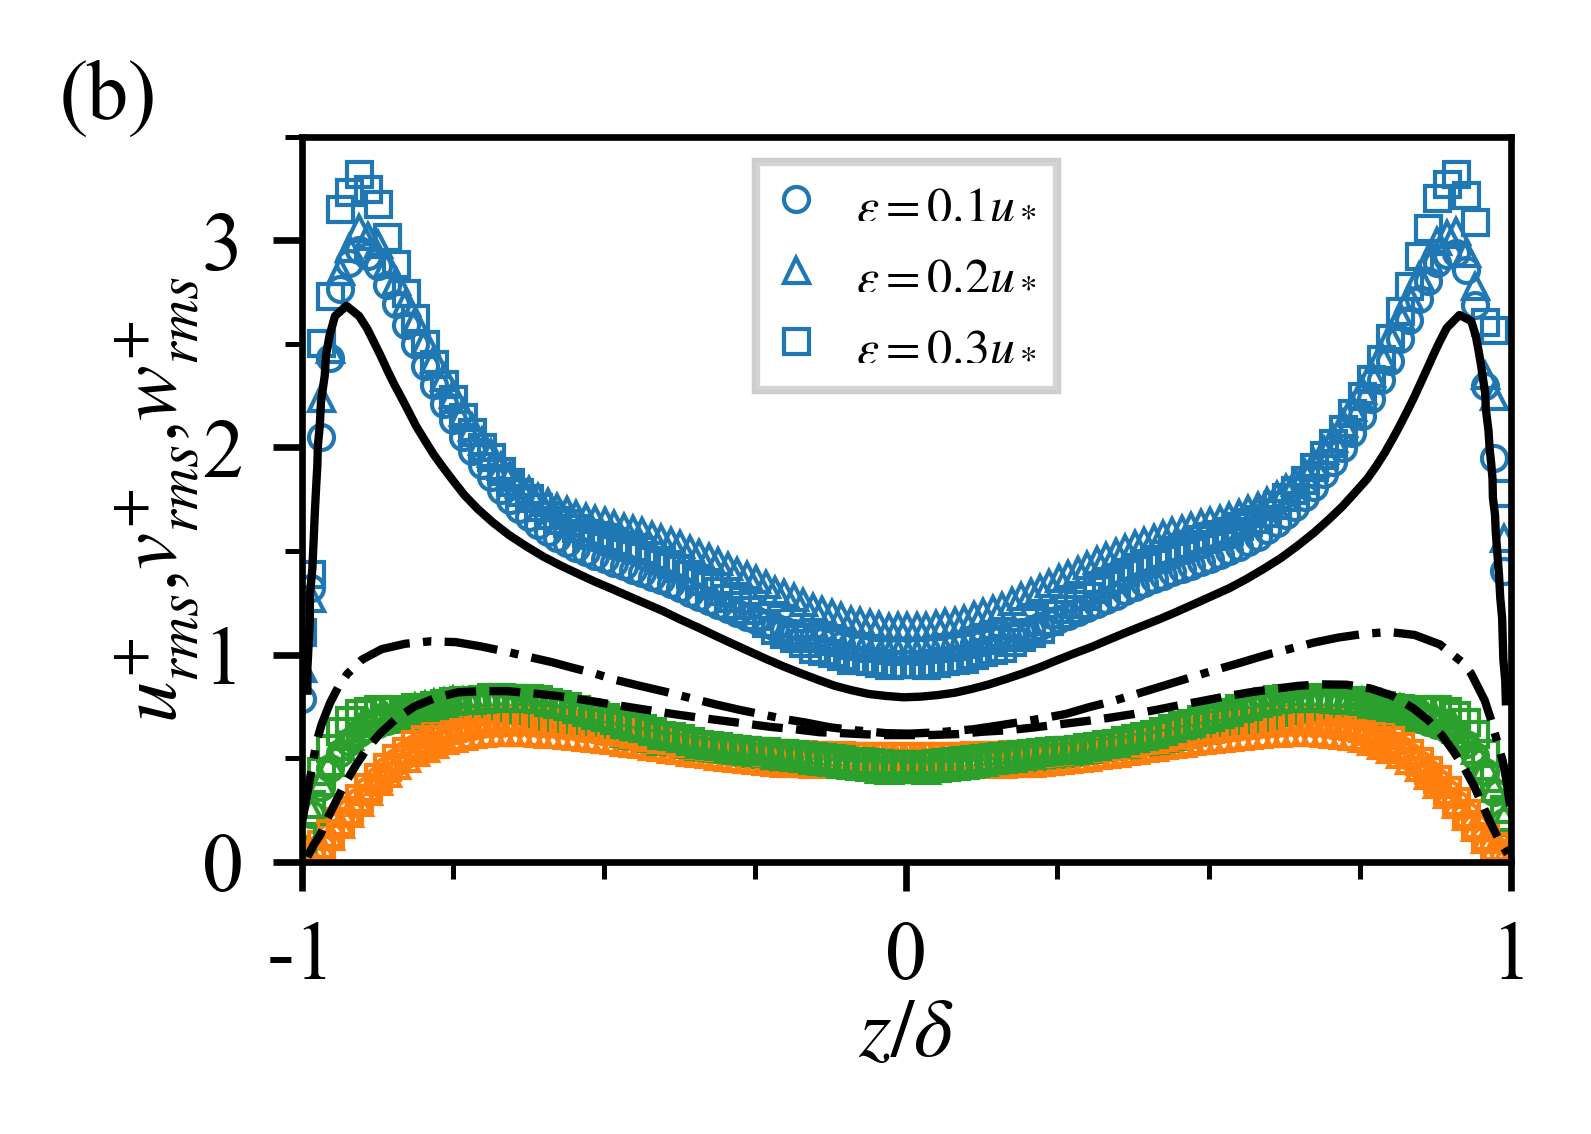

In [13]:
""" FIGURE: Re=180 rms velocity in channel corrdinate """
fig = plt.figure(figsize=[2.6,1.6]); ax=plt.gca()

def plots_3 (folder='square_LEVEL7_emax0.1', tseries=np.arange(180,200), marker='o', skip=1, N=200, y_tau = 1/180):   
    stats = [];
    for t in tseries:
        filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/' + folder + '/prof_%g' %t
        stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
        stats.append(stat)

    uxux = (stats[0].uxux-stats[0].ux*stats[0].ux)**0.5/0.1
    uyuy = (stats[0].uyuy-stats[0].uy*stats[0].uy)**0.5/0.1
    uzuz = (stats[0].uzuz-stats[0].uz*stats[0].uz)**0.5/0.1
    for stat in stats[1:]:
        uxux = uxux + (stat.uxux-stat.ux*stat.ux)**0.5/0.1
        uyuy = uyuy + (stat.uyuy-stat.uy*stat.uy)**0.5/0.1
        uzuz = uzuz + (stat.uzuz-stat.uz*stat.uz)**0.5/0.1

    uxux = (np.array(uxux) + np.array(uxux)[::-1])/2
    uyuy = (np.array(uyuy) + np.array(uyuy)[::-1])/2
    uzuz = (np.array(uzuz) + np.array(uzuz)[::-1])/2
    
    N = -1
    l = plt.plot(stats[0].y[0:N:skip], uxux[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C0')
    # plt.plot((stat.y+1)/y_tau, (stats1[0].uxux-stats1[0].ux*stats1[0].ux)**0.5/0.1, label = '$u_{rms}/u_*$', marker='o', mfc='none', lw=0, markersize=3, markeredgewidth=0.5)
    plt.plot(stats[0].y[0:N:skip], uyuy[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C1')
    plt.plot(stats[0].y[0:N:skip], uzuz[0:N:skip]/len(stats), label = '$u_{rms}/u_*$', marker=marker, mfc='none', lw=0, markersize=3, markeredgewidth=0.5, c='C2')
    return l

l1, = plots_3(folder='square180/square_LEVEL9_emax0.1_resume', tseries=np.arange(175,300), marker='o', skip=4)
l2, = plots_3(folder='square180/square_LEVEL9_emax0.2_resume', tseries=np.arange(175,300), marker='^', skip=4)
l3, = plots_3(folder='square180/square_LEVEL9_emax0.3_resume', tseries=np.arange(150,200), marker='s', skip=4)

Kim_rms = Kim_rms.sort_values(by='y1', ascending=True)
plt.plot(Kim_rms.y1, Kim_rms.wrms, '--', lw=1, c='k')
Kim_rms = Kim_rms.sort_values(by='y2', ascending=True)
plt.plot(Kim_rms.y2, Kim_rms.vrms, '-.', lw=1, c='k')
Kim_rms = Kim_rms.sort_values(by='y3', ascending=True)
plt.plot(Kim_rms.y3, Kim_rms.urms, '-', lw=1, c='k')
# plt.plot(stat.y, (stat.uyuy-stat.uy*stat.uy)**0.5/0.1, label = '$v_{rms}/u_*$')
# plt.plot(stat.y, (stat.uzuz-stat.uz*stat.uz)**0.5/0.1, label = '$w_{rms}/u_*$')

legend1 = plt.legend([l1,l2,l3], [r'$\epsilon=0.1u_*$',r'$\epsilon=0.2u_*$',r'$\epsilon=0.3u_*$'],
                    handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper center', fancybox=False, fontsize=6, handlelength=0.8)
ax.add_artist(legend1)

plt.ylim([0,3.5]); 
plt.xlim([-1,1]); 
plt.xlabel('$z/\delta$', labelpad=0); plt.ylabel('$u_{rms}^{+}$,$v_{rms}^{+}$,$w_{rms}^{+}$', labelpad=0)
plt.xticks((-1,0,1))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.annotate('(b)', xy=(-0.2, 1), ha='left', va='bottom', xycoords='axes fraction')
fig.savefig('figures_jfm/DNS_rms2.pdf', bbox_inches='tight', pad_inches=0)
fig.savefig('figures_jfm/DNS_rms2.eps', bbox_inches='tight', pad_inches=0)

### Reynolds stress

In [5]:
Kim_REstress = pd.read_csv('otherdata/extracted_data/Kim1987_REstress_1.csv', names=['y','uxuy'], delimiter = ',', skiprows=2)
Kim_REstress = Kim_REstress.sort_values(by='y', ascending=True)

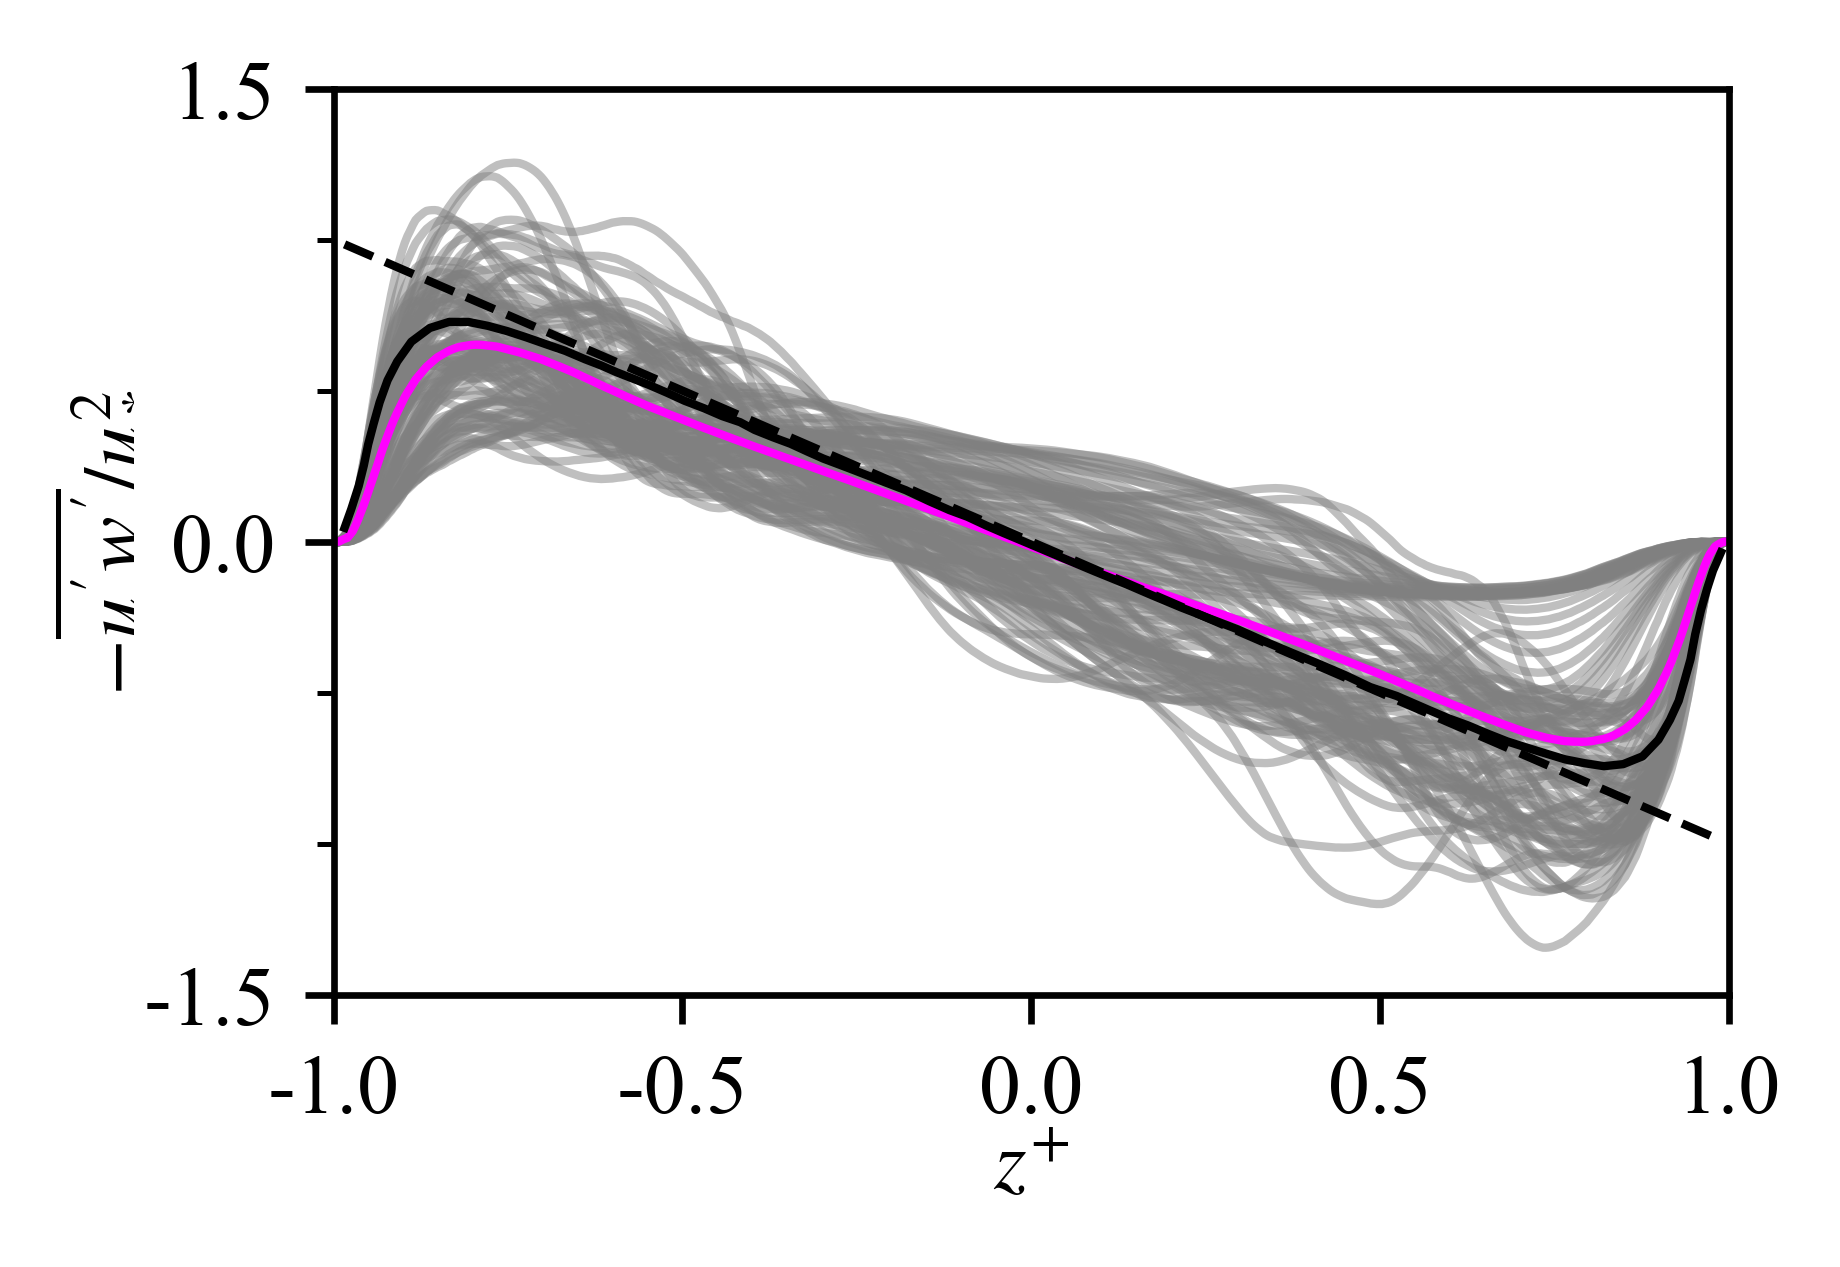

In [7]:
""" FIGURE: Reynolds stress 180 """
fig = plt.figure(figsize=[3,2]); ax = plt.gca()
y_tau = 1/180; u_tau = 0.1

def plots (folder='square_LEVEL7_emax0.1', tseries=np.arange(180,200), cchoice='blue'):
    y_tau = 1/180
    stats = [];
    for t in tseries:
        filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/' + folder + '/prof_%g' %t
        stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
        stats.append(stat)

    uxuy = (stats[0].uxuy-stats[0].ux*stats[0].uy)
    for stat in stats[1:]:
        uxuy_ = (stat.uxuy-stat.ux*stat.uy)
        uxuy = uxuy + uxuy_      
        plt.plot(stat.y, -uxuy_/0.01, c='gray', lw=1, alpha=0.5)

    plt.plot(stat.y, -uxuy/0.01/len(stats), lw=1, c=cchoice)

# plots (folder='square180/square_LEVEL7_emax0.1', tseries=np.arange(220,320), cchoice='magenta')
# plots (folder='square180/square_LEVEL9_emax0.3_resume', tseries=np.arange(100,200), cchoice='magenta')
# plots (folder='square180/square_LEVEL9_emax0.2_resume', tseries=np.arange(300,400), cchoice='magenta')
plots (folder='square180/square_LEVEL9_emax0.1_resume', tseries=np.arange(200,300), cchoice='magenta')
plt.plot(Kim_REstress.y, Kim_REstress.uxuy, c='k', lw = 1)
plt.plot(Kim_REstress.y, -Kim_REstress.y, '--', c='k', lw = 1)
      
plt.ylim([-1.5,1.5]); plt.xlim([-1,1])
# ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(1.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
plt.xlabel(r'$z^{+}$', labelpad=0); plt.ylabel(r'$-\overline{u^{\prime}w^{\prime}}/u_*^2$', labelpad=0)
fig.savefig('figures_jfm/DNS_REstress.pdf', bbox_inches='tight', pad_inches=0)
fig.savefig('figures_jfm/DNS_REstress.pdf', bbox_inches='tight', pad_inches=0)

Text(0, 0.5, '$-\\overline{u^{\\prime}v^{\\prime}}/u_*^2$')

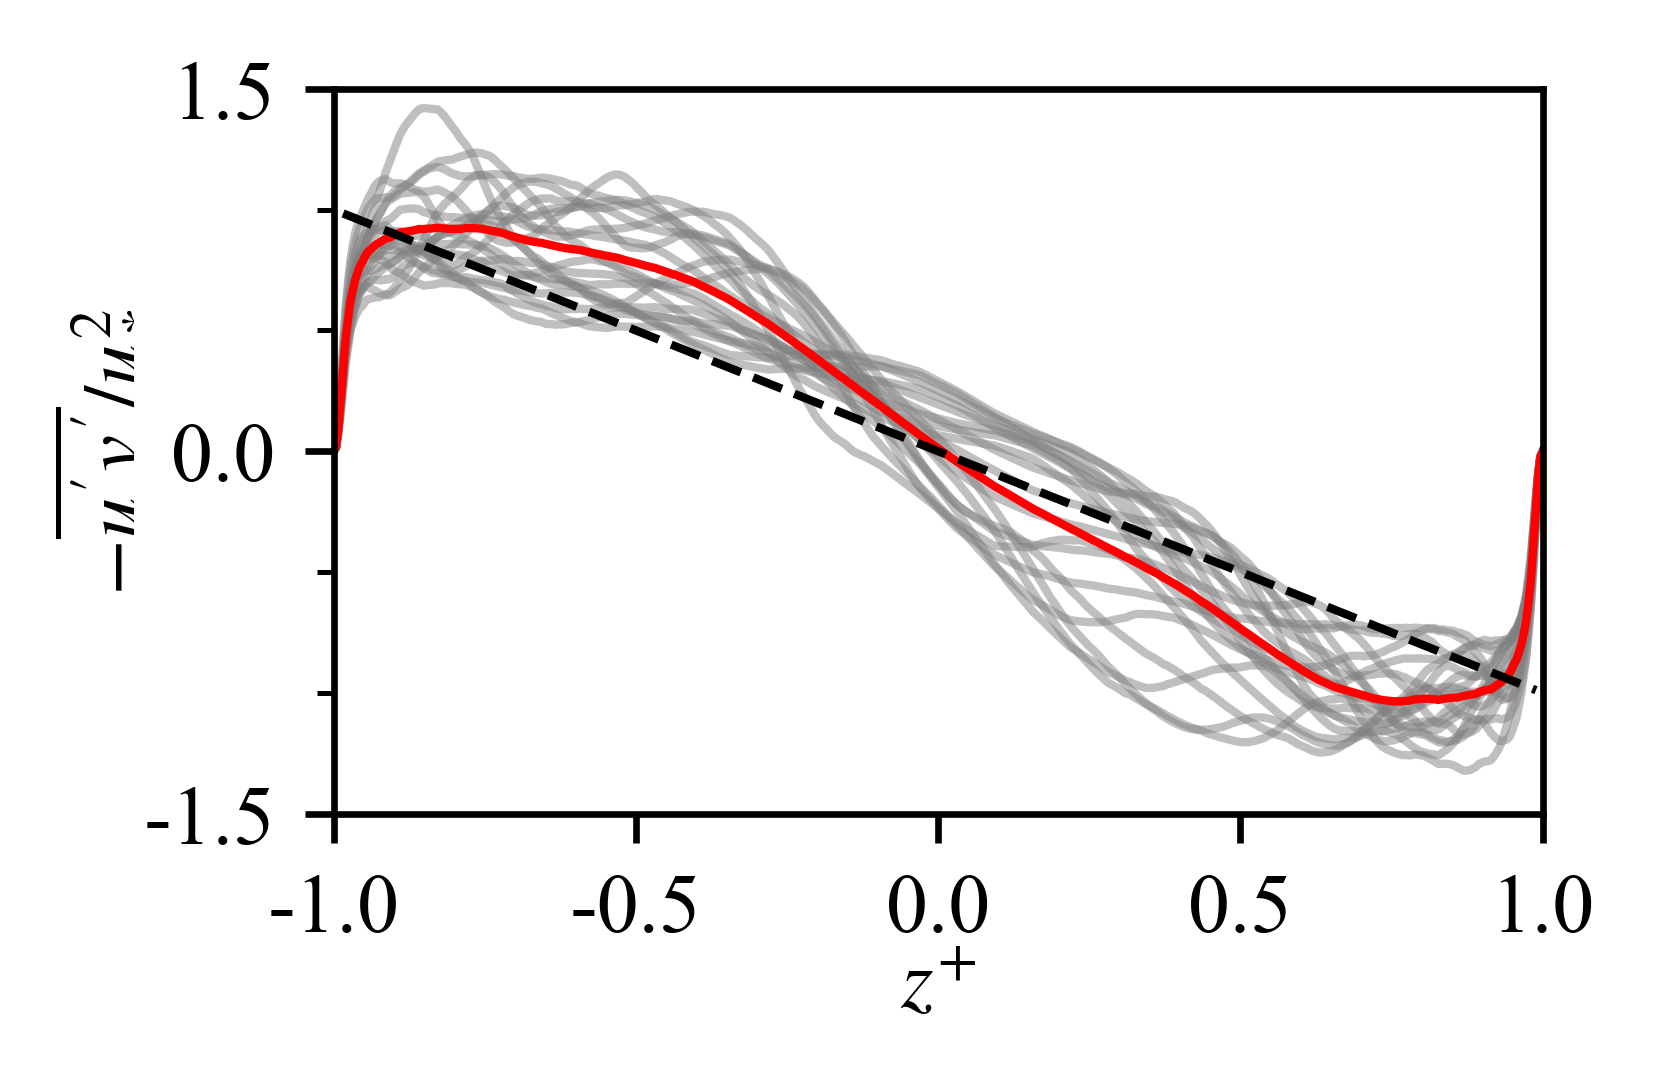

In [282]:
""" Re = 720 (only half channel) """
fig = plt.figure(figsize=[2.6,1.6]); ax=plt.gca()

""" Two phase """
def plots_2 (ux_ensem, uy_ensem, label=' ', cchoice='magenta'):  
    y_tau = (2*np.pi-1)/720
    u_tau = 0.25
    y = np.linspace(-1,np.pi*2-1,512,endpoint=False)+2*np.pi/2**512/2*3 # the *3 is because of wrong slice indexing
    uxuy = np.zeros((ux_ensem.shape[0],512))
    for i in range(ux_ensem.shape[0]):
        ux_aver = np.tile(np.average(ux_ensem[i], axis=(0,1)), (255,512,1))
        uy_aver = np.tile(np.average(uy_ensem[i], axis=(0,1)), (255,512,1))
        uxuy[i] = (np.average((ux_ensem[i]-ux_aver)*(uy_ensem[i]-uy_aver), axis=(0,1)))
    plt.plot((y[::4]-(2*np.pi-1))/(2*np.pi-1), -np.average(uxuy, axis=0)[::4]/u_tau**2, label=label, lw=1, c=cchoice)
    return np.average(uxuy, axis=0)

# uxuy1 = plots_2(np.array(ux1),np.array(uy1), cchoice='magenta')
# uxuy2 = plots_2(np.array(ux2),np.array(uy2), cchoice='darkviolet')

""" One phase """
def plots (folder='square_LEVEL7_emax0.1', tseries=np.arange(180,200), cchoice='blue'):
    y_tau = 1/720
    stats = [];
    for t in tseries:
        filename = '/projects/DEIKE/jiarongw/turbulence_oldcases/channel/' + folder + '/prof_%g' %t
        stat = pd.read_table(filename, delimiter = '\t', names = ['y','ux','uy','uz','uxuy','uxux','uyuy','uzuz'], skiprows=[0])
        stats.append(stat)

    uxuy = (stats[0].uxuy-stats[0].ux*stats[0].uy)
    for stat in stats[1:]:
        uxuy_ = (stat.uxuy-stat.ux*stat.uy)
        uxuy = uxuy + uxuy_      
        plt.plot(stat.y, -uxuy_/0.01, c='gray', lw=1, alpha=0.5)

    plt.plot(stat.y, -uxuy/0.01/len(stats), lw=1, c=cchoice)

plots(folder='square720/square_LEVEL9_emax0.3', tseries=np.arange(120,140), cchoice='r')
# plots(folder='square720/square_LEVEL9_emax0.2', tseries=np.arange(130,165), cchoice='b')
# plots(folder='square720/square_LEVEL9_emax0.1', tseries=np.arange(129,131), cchoice='magenta')
             
# plt.plot(Kim_REstress.y, Kim_REstress.uxuy, c='k', lw = 1)
plt.plot(Kim_REstress.y, -Kim_REstress.y, '--', c='k', lw = 1)

plt.ylim([-1.5,1.5]); plt.xlim([-1,1])
# ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(1.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
plt.xlabel(r'$z^{+}$', labelpad=0); plt.ylabel(r'$-\overline{u^{\prime}v^{\prime}}/u_*^2$', labelpad=0)

In [ ]:
""" Function that computes 2 point correlation """
def correlation(ux_3D, uy_3D, slicei):
    ux_3D = np.array(ux_3D)
    ux_slice = ux_3D[:,:,slicei]
    ux_slice_aver = np.average(ux_slice)
    uy_3D = np.array(uy_3D)
    uy_slice = uy_3D[:,:,slicei]
    uy_slice_aver = np.average(uy_slice)
    # uz_3D = np.array(uz_3D)
    # uz_slice = uz_3D[:,:,slicei]
    # uz_slice_aver = np.average(uz_slice)
    # Compute two-point correlation
    L0 = 2*np.pi
    rx = np.zeros(256); R11x = np.zeros(256); R22x = np.zeros(256); R33x = np.zeros(256) # Use first half of data
    for i in range (0,256):
        rx[i] = L0/NGRID*i
        ux1 = ux_slice[:,0:256]-ux_slice_aver; ux2 = ux_slice[:,(0+i):(256+i)]-ux_slice_aver
        uy1 = uy_slice[:,0:256]-uy_slice_aver; uy2 = uy_slice[:,(0+i):(256+i)]-uy_slice_aver
    #     uz1 = uz_slice[0:128,:]-uz_slice_aver; uz2 = uz_slice[(0+i):(128+i),:]-uz_slice_aver
        R11x[i] = np.average(ux1*ux2)/np.average((ux_slice[:,0:256]-ux_slice_aver)*(ux_slice[:,0:256]-ux_slice_aver))
        R22x[i] = np.average(uy1*uy2)/np.average((uy_slice[:,0:256]-uy_slice_aver)*(uy_slice[:,0:256]-uy_slice_aver))
    #     R33x[i] = np.average(uz1*uz2)/np.average((uz_slice[0:128,:]-uz_slice_aver)*(uz_slice[0:128,:]-uz_slice_aver))
    rz = np.zeros(128); R11z = np.zeros(128); R22z = np.zeros(128); R33z = np.zeros(128)
    for i in range (0,128):
        rz[i] = L0/NGRID*i
        ux1 = ux_slice[:,0:128]-ux_slice_aver; ux2 = ux_slice[:,(0+i):(128+i)]-ux_slice_aver
        uy1 = uy_slice[:,0:128]-uy_slice_aver; uy2 = uy_slice[:,(0+i):(128+i)]-uy_slice_aver
    #     uz1 = uz_slice[:,0:128]-uz_slice_aver; uz2 = uz_slice[:,(0+i):(128+i)]-uz_slice_aver
        R11z[i] = np.average(ux1*ux2)/np.average((ux_slice[:,0:128]-ux_slice_aver)*(ux_slice[:,0:128]-ux_slice_aver))
        R22z[i] = np.average(uy1*uy2)/np.average((uy_slice[:,0:128]-uy_slice_aver)*(uy_slice[:,0:128]-uy_slice_aver))
    #     R33z[i] = np.average(uz1*uz2)/np.average((uz_slice[:,0:128]-uz_slice_aver)*(uz_slice[:,0:128]-uz_slice_aver))
    return rx, R11x, R22x, rz, R11z, R22z

In [14]:
# Spatial structure - two point correlation R11, R22 and R33
dirname = '/home/jiarong/research/projects/turbulence/channel/onephase_test3/field/'
t = 260; NGRID = 256
dirname = '/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_precursor_REtau720_ak0.1_LEVEL10_emax0.3/field/'
t = 60; NGRID = 512
# Later change this to taking x-z plane slice
# ux_3D = [] ; uy_3D = [] ; uz_3D = []
# axis0 in y, axis1 in x, axis2 in z  (in the code)
# for i in range (0,256):
#     filename = dirname + 'ux_t%g_slice%g' % (t,i)
#     snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
#     snapshot.reshape([NGRID,NGRID+1])
#     ux = snapshot[:,0:NGRID].astype(np.float)
#     ux_3D.append(ux)
#     filename = dirname + 'uy_t%g_slice%g' % (t,i)
#     snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
#     snapshot.reshape([NGRID,NGRID+1])
#     uy = snapshot[:,0:NGRID].astype(np.float)
#     uy_3D.append(uy)
#     filename = dirname + 'uz_t%g_slice%g' % (t,i)
#     snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
#     snapshot.reshape([NGRID,NGRID+1])
#     uz = snapshot[:,0:NGRID].astype(np.float)
#     uz_3D.append(uz)

In [59]:
delta = (2*np.pi-1)/720
(300/512*2*np.pi-1)/wavelen

1.7071302276324185

Text(0.5, 0, '$x/\\lambda$')

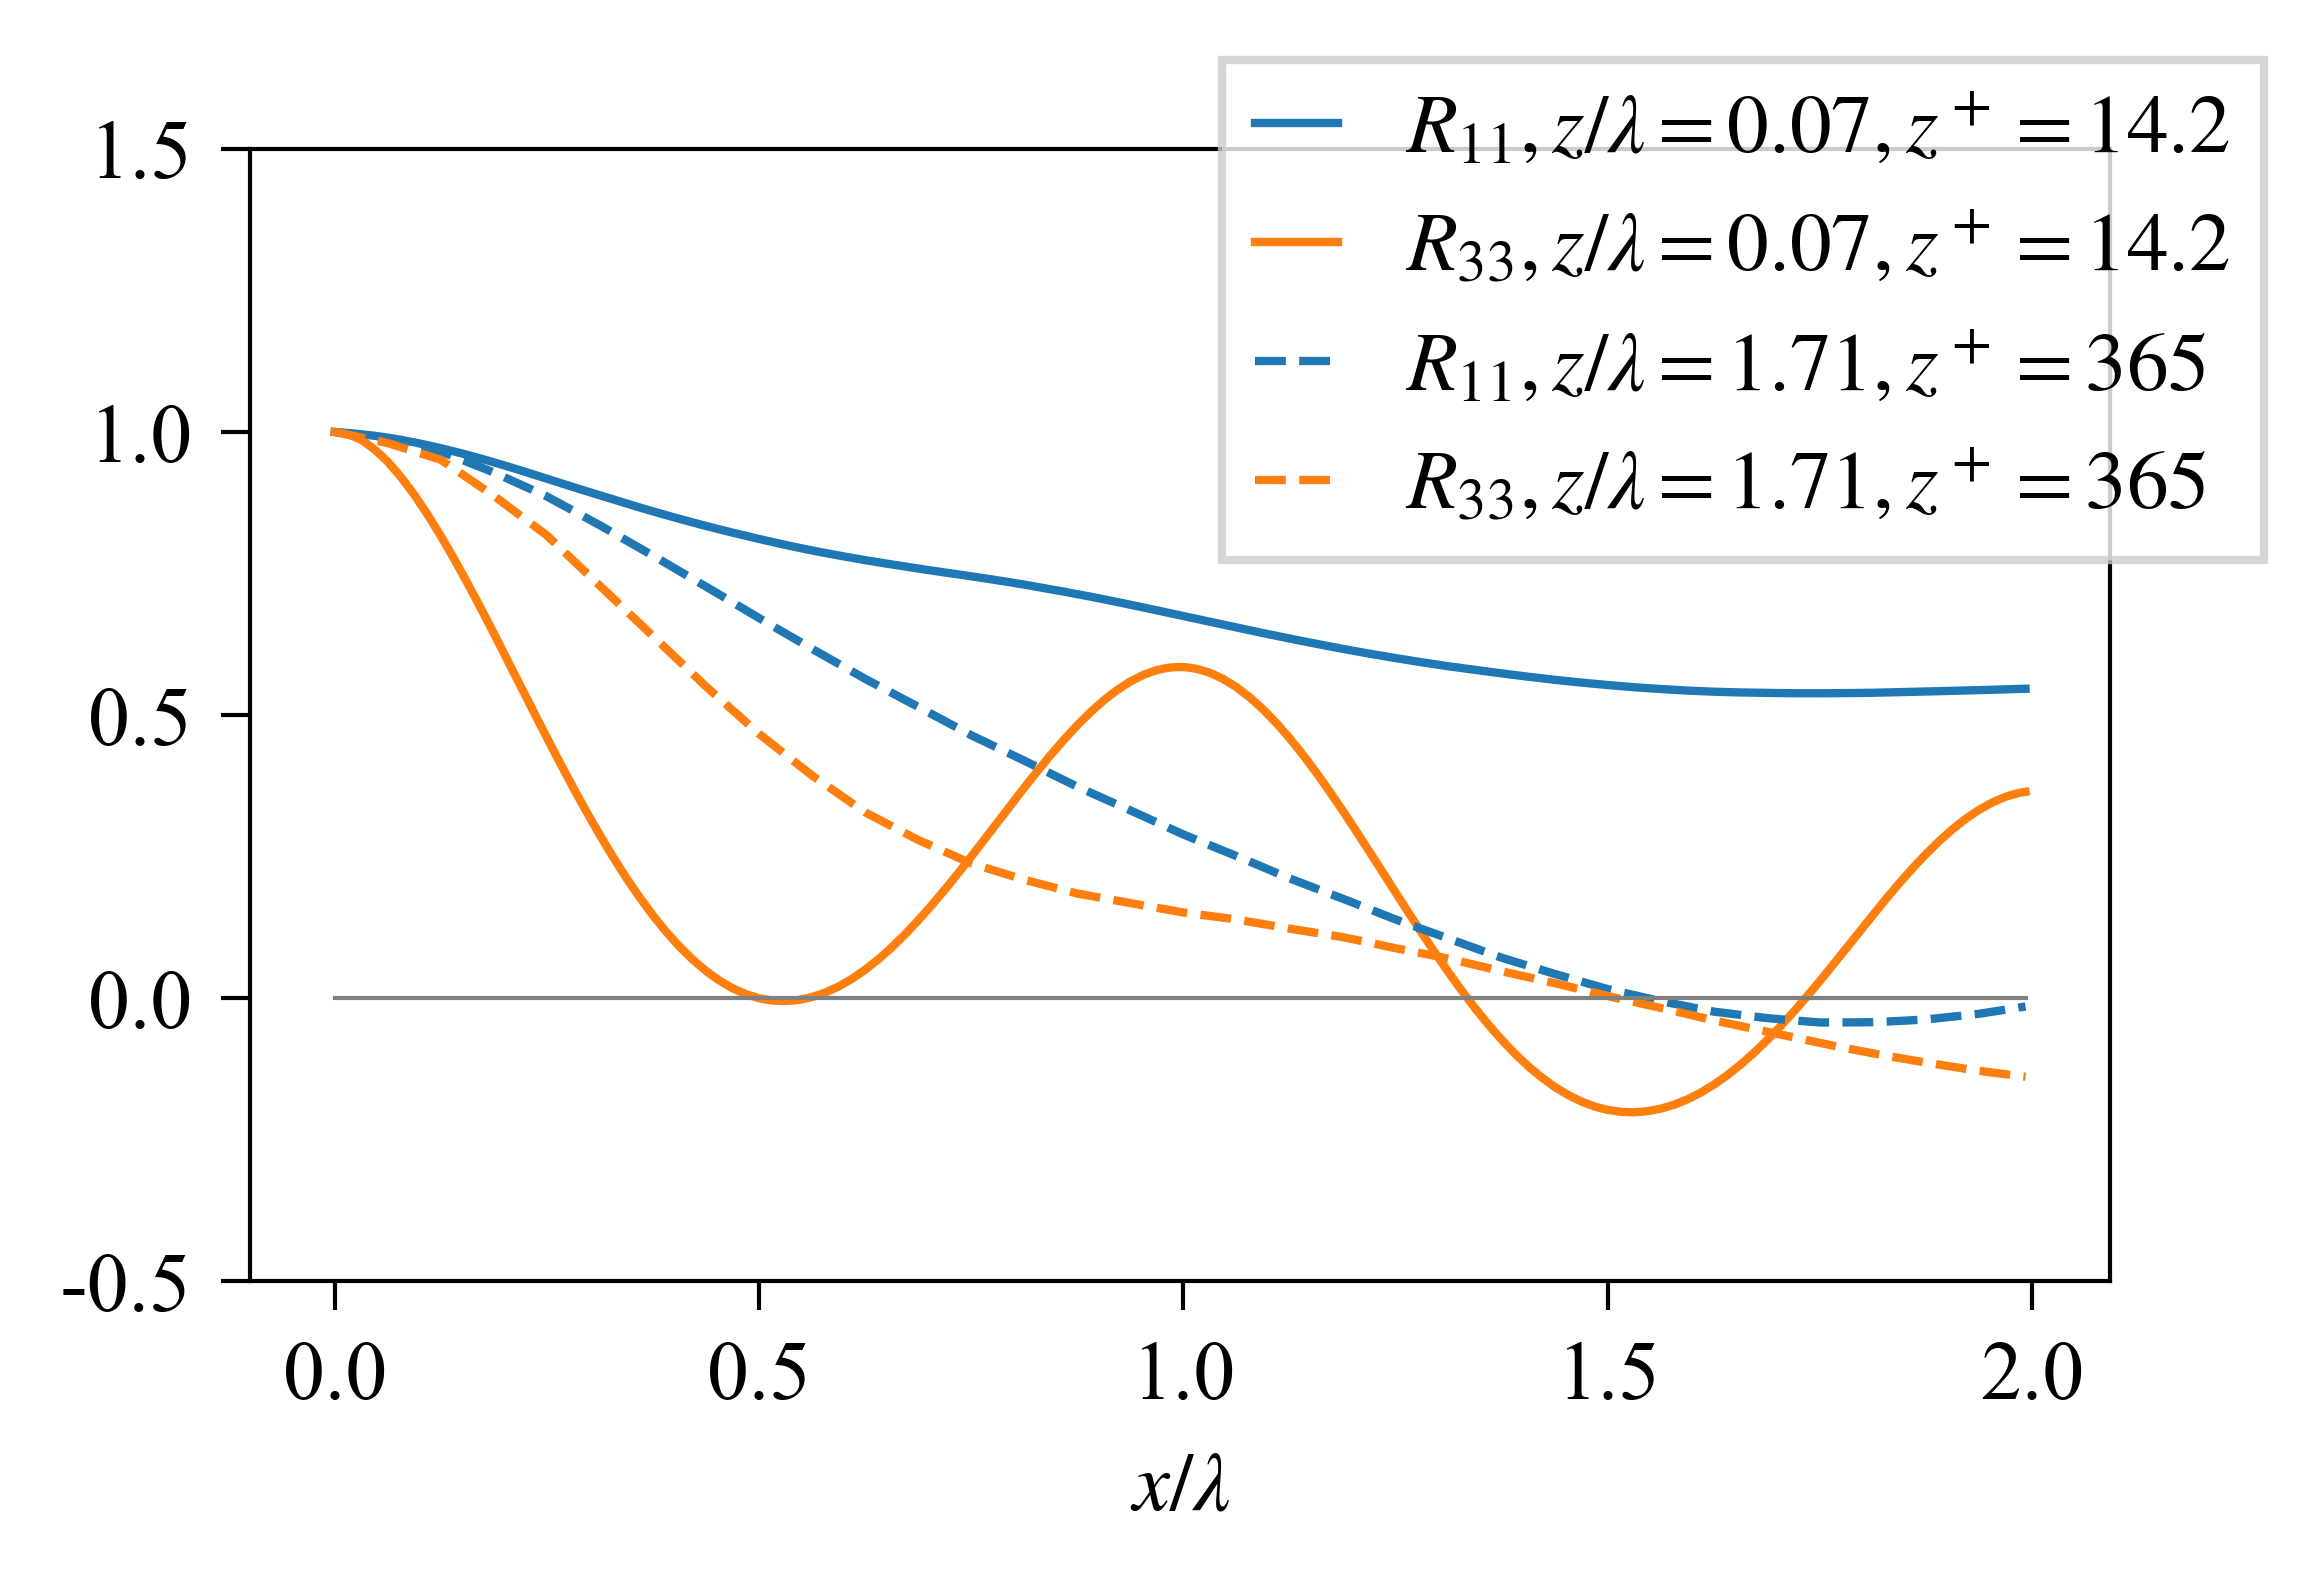

In [16]:
fig = plt.figure(figsize=[4,2.5])
wavelen = 2*np.pi/4

# plt.plot(rx/(L0-1), R11x, label=r'$R_{11}$')
# plt.plot(rx/(L0-1), R22x, '--', label=r'$R_{22}$')
# plt.plot(rx/(L0-1), 0*rx, color = 'grey')

slicei = 90 # 1 - (4*np.pi/256*18+0+2*np.pi/256) = 0.0918
rx, R11x, R22x, rz, R11z, R22z = correlation(ux_3D, uy_3D, slicei)
plt.plot(rx/wavelen, R11x, label=r'$R_{11}, z/\lambda=0.07, z^+=14.2$', lw=1)
plt.plot(rx/wavelen, R22x, label=r'$R_{33}, z/\lambda=0.07, z^+=14.2$', lw=1)
slicei = 300 # 1 - (4*np.pi/256*18+0+2*np.pi/256) = 0.0918
rx, R11x, R22x, rz, R11z, R22z = correlation(ux_3D, uy_3D, slicei)
plt.plot(rx/wavelen, R11x, '--', label=r'$R_{11}, z/\lambda=1.71, z^+=365$', lw=1, c='C0')
plt.plot(rx/wavelen, R22x, '--', label=r'$R_{33}, z/\lambda=1.71, z^+=365$', lw=1, c='C1')
plt.plot(rx/wavelen, 0*rx, color = 'grey', lw=0.5)

plt.ylim([-0.5,1.5]); 
# plt.xlim([0,2]); 
plt.legend(fancybox=False, handlelength=1, bbox_to_anchor=(0.5, 0.6))
plt.xlabel(r'$x/\lambda$')
# fig.savefig('./review/autocorrelation.pdf', bbox_inches='tight')

Text(0.5, 0, '$z/\\delta$')

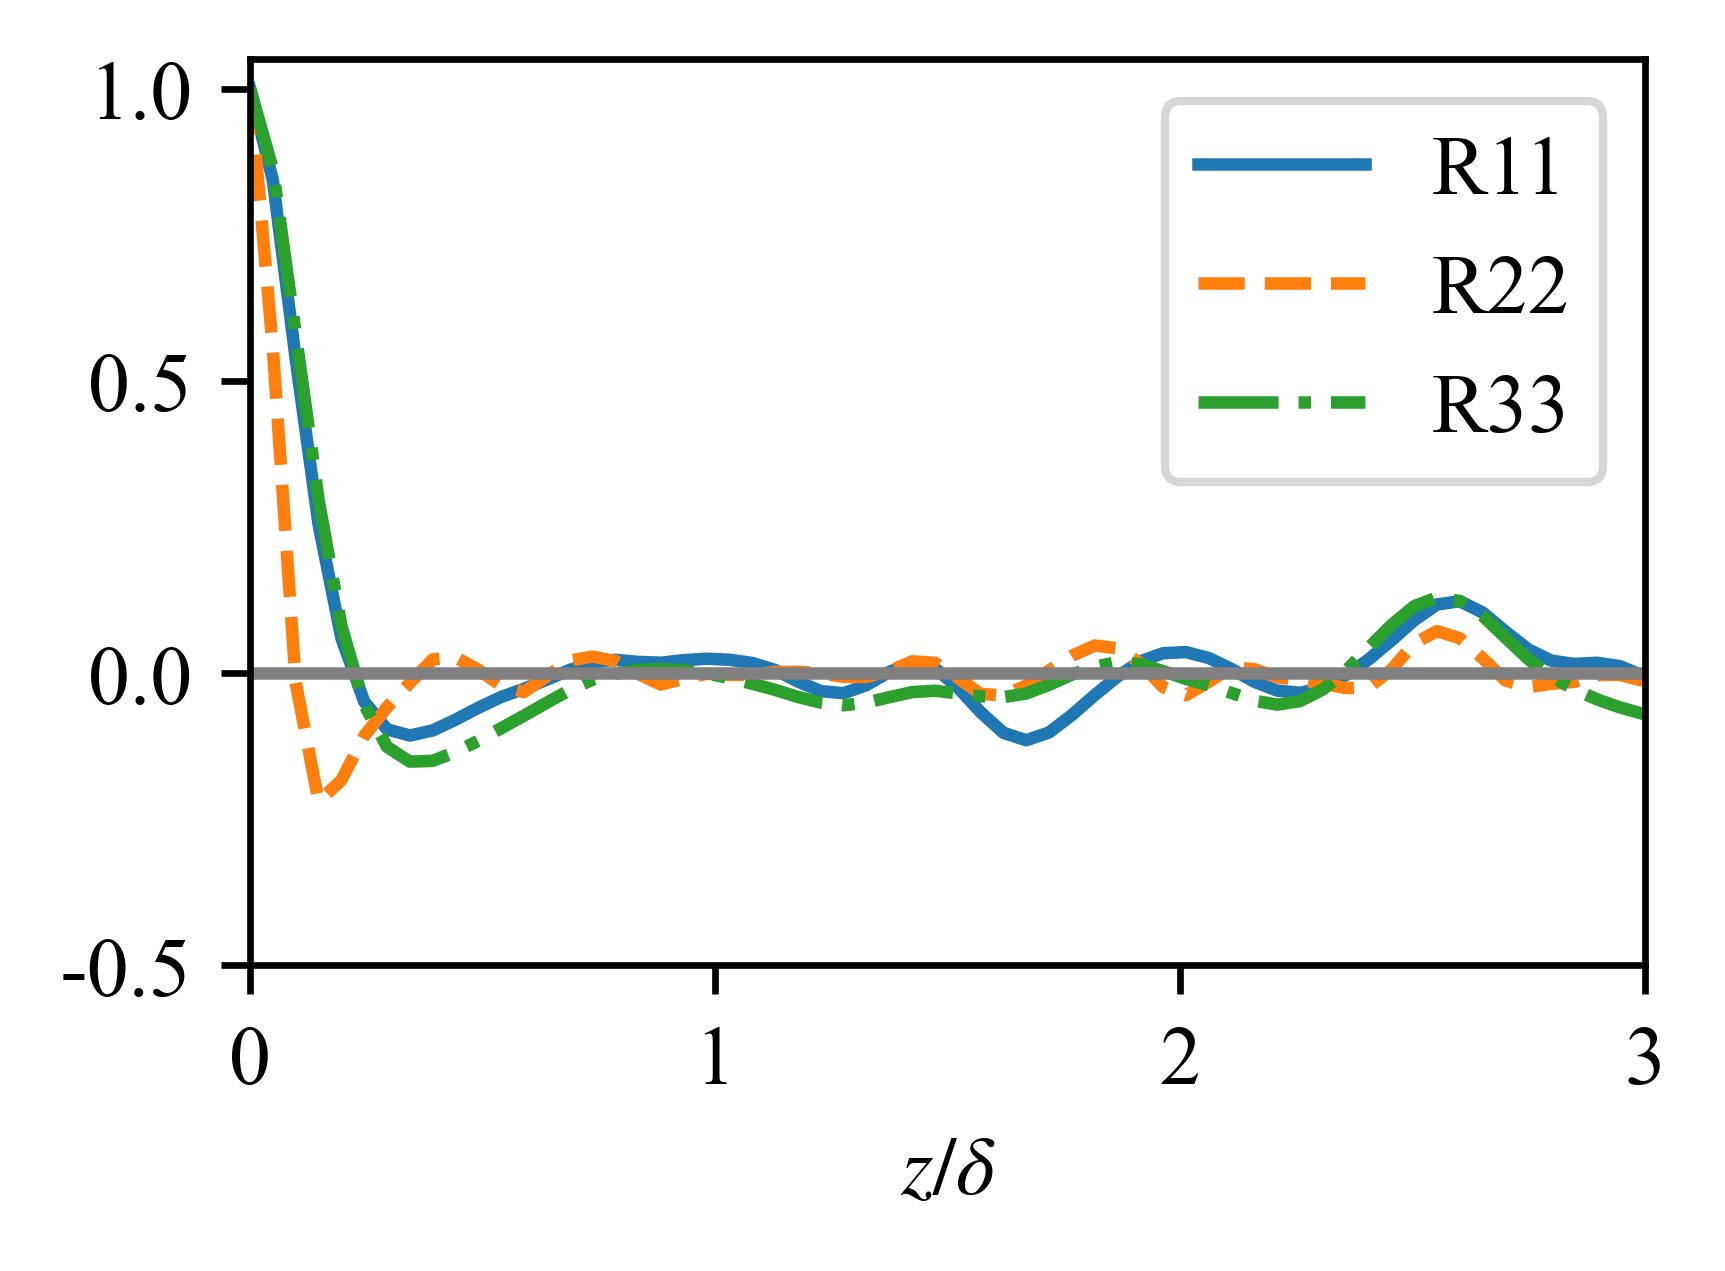

In [19]:
plt.figure(figsize=[3,2])
plt.plot(rz, R11z, label='R11'); plt.plot(rz, R22z, '--', label='R22'); plt.plot(rz, R33z, '-.', label='R33')
plt.plot(rz, 0*rz, color = 'grey')
plt.ylim([-0.5,1.05]); plt.xlim([0,3]); plt.legend()
plt.xlabel('$z/\delta$')

In [ ]:
""" Visualization of the slice """
ux_3D = np.array(ux_3D)
ux_slice = ux_3D[:,:,slicei]
plt.imshow(ux_slice)
plt.colorbar()

/home/jiarongw/anaconda3/envs/gp/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jiarongw/anaconda3/envs/gp/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jiarongw/anaconda3/envs/gp/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, '$kx$')

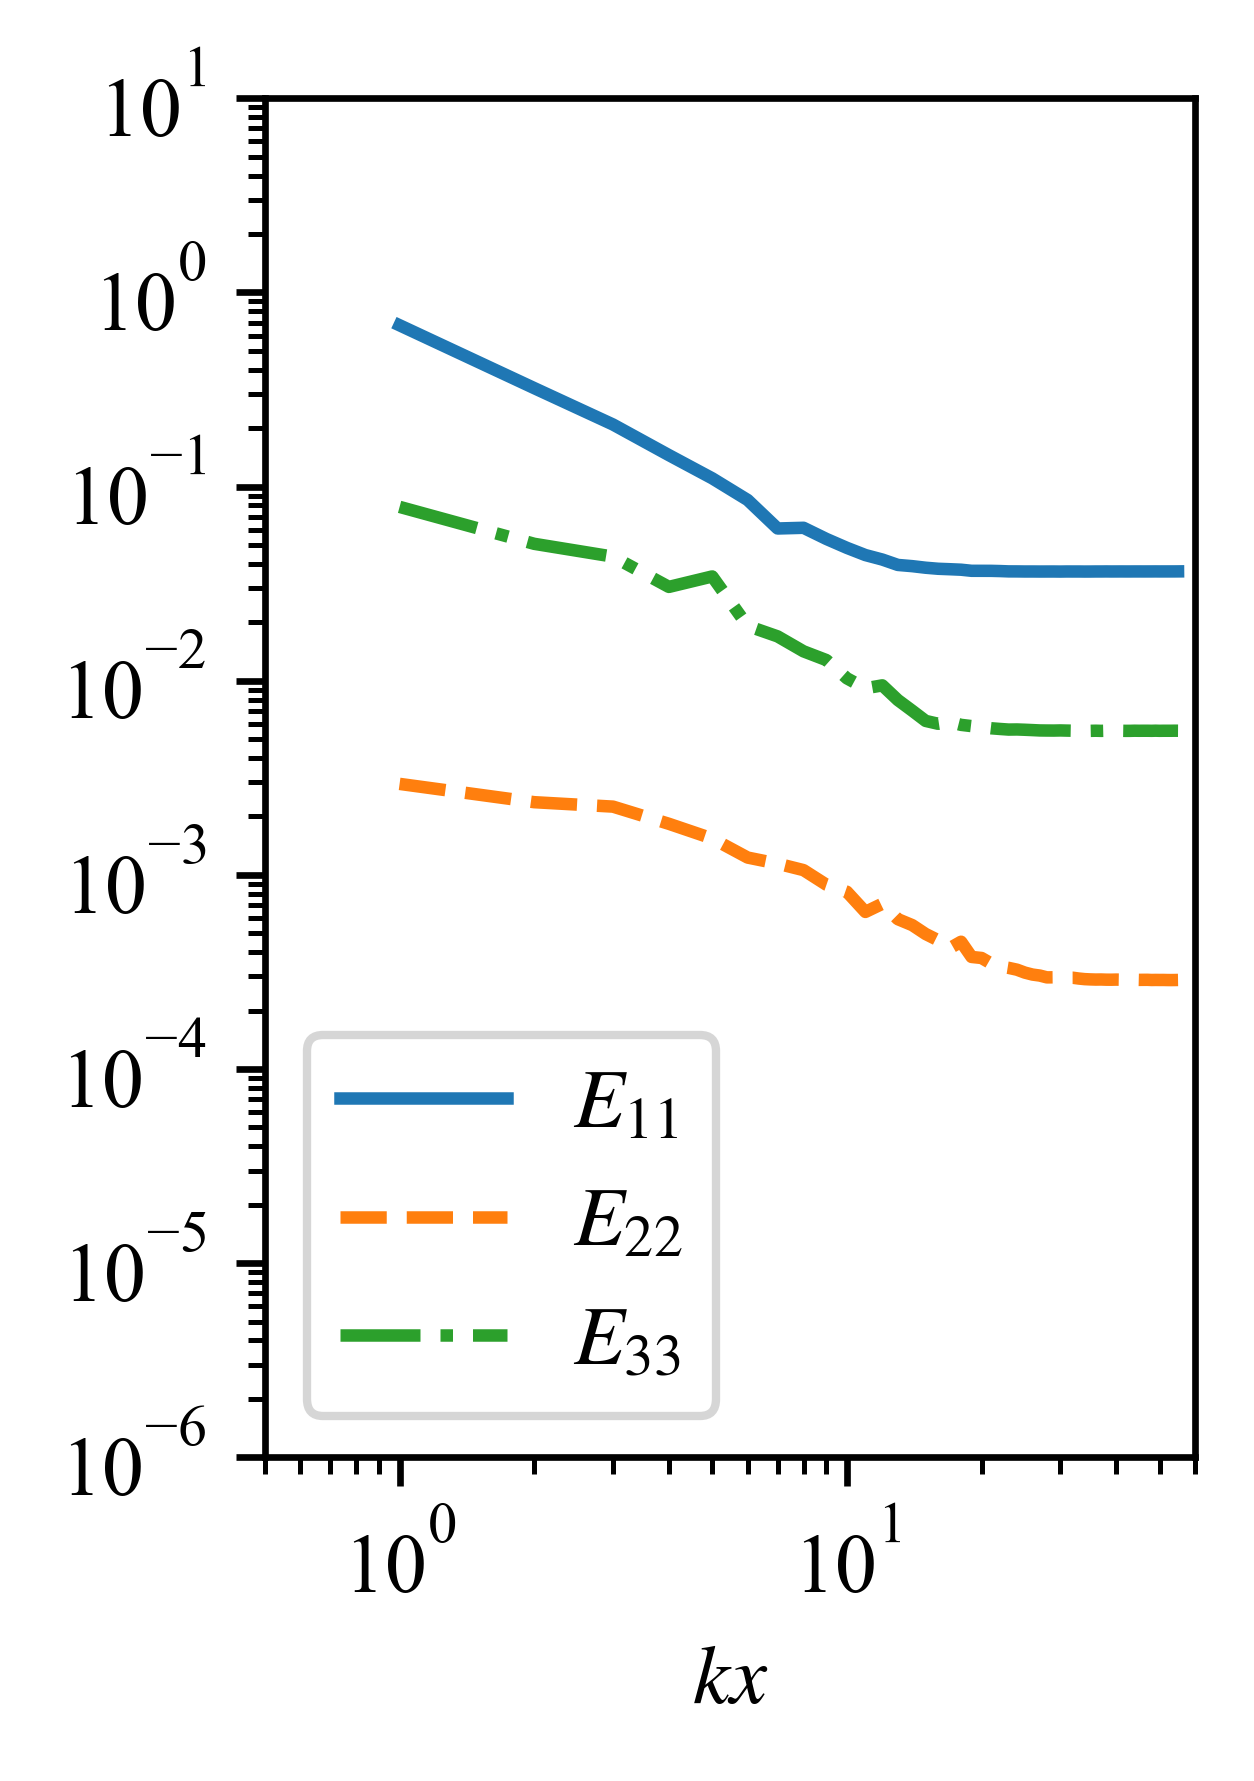

In [21]:
# Spatial structure - spectrum Euu Evv Eww
# Fourier transform of R11
E11 = np.fft.fftn(R11x*np.average((ux_slice[:,0:128]-ux_slice_aver)*(ux_slice[:,0:128]-ux_slice_aver))) 
E22 = np.fft.fftn(R22x*np.average((uy_slice[:,0:128]-uy_slice_aver)*(uy_slice[:,0:128]-uy_slice_aver)))
E33 = np.fft.fftn(R33x*np.average((uz_slice[:,0:128]-uz_slice_aver)*(uz_slice[:,0:128]-uz_slice_aver)))
# E11 = np.absolute(spectrum)
E11 = np.fft.fftshift(E11)*2; E22 = np.fft.fftshift(E22)*2; E33 = np.fft.fftshift(E33)*2
kx = 2*np.pi*np.fft.fftfreq(n=np.size(rx),d=(rx[1]-rx[0]))
kx = np.fft.fftshift(kx)

plt.figure(figsize=[2,3])
plt.plot(kx[65:120], E11[65:120], label=r'$E_{11}$')
plt.plot(kx[65:120], E22[65:120], '--', label=r'$E_{22}$') 
plt.plot(kx[65:120], E33[65:120], '-.', label=r'$E_{33}$')
plt.xscale('log'); plt.yscale('log')
plt.ylim(1e-6,10); plt.xlim(0.5, 60);
plt.legend(); plt.xlabel('$kx$')

Text(0.5, 0, 'kz')

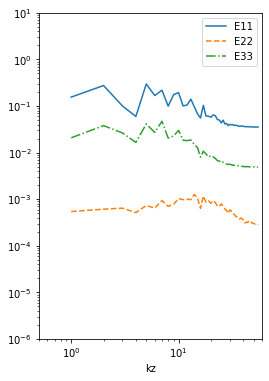

In [392]:
E11 = np.fft.fftn(R11z*np.average((ux_slice[:,0:128]-ux_slice_aver)*(ux_slice[:,0:128]-ux_slice_aver))) 
E22 = np.fft.fftn(R22z*np.average((uy_slice[:,0:128]-uy_slice_aver)*(uy_slice[:,0:128]-uy_slice_aver)))
E33 = np.fft.fftn(R33z*np.average((uz_slice[:,0:128]-uz_slice_aver)*(uz_slice[:,0:128]-uz_slice_aver)))
E11 = np.fft.fftshift(E11)*2; E22 = np.fft.fftshift(E22)*2; E33 = np.fft.fftshift(E33)*2
kx = 2*np.pi*np.fft.fftfreq(n=np.size(rx),d=(rx[1]-rx[0]))
kx = np.fft.fftshift(kx)
plt.figure(figsize=[4,6])
plt.plot(kx[65:120], E11[65:120], label='E11')
plt.plot(kx[65:120], E22[65:120], '--', label='E22')
plt.plot(kx[65:120], E33[65:120], '-.', label='E33')
plt.xscale('log'); plt.yscale('log')
plt.ylim(1e-6,10); plt.xlim(0.5, 60);
plt.legend(); plt.xlabel('kz')